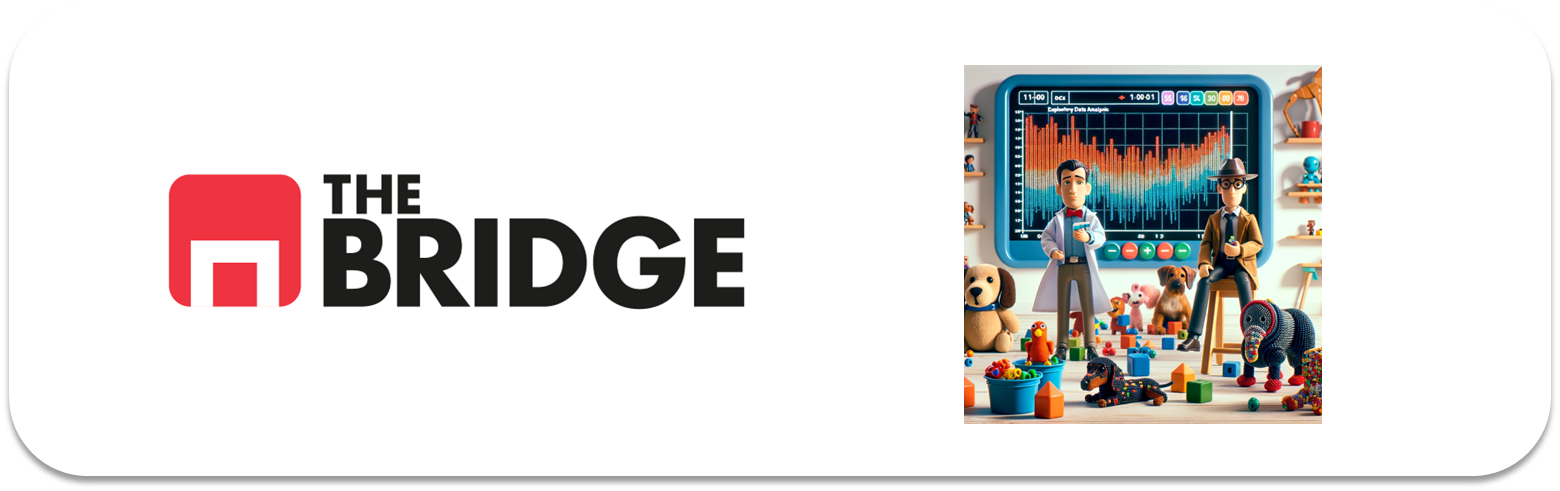

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools as boot

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
print(df_titanic.info())
df_titanic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns = ['deck', "survived", "pclass", "embarked"], inplace = True)
print(df_titanic.info())
df_titanic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB
None


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
# Creo una columna nueva con la suma de las columnas 'parch' y 'sibsp'
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']

# Elimino las columnas 'parch' y 'sibsp'
df_titanic.drop(columns = ['parch', 'sibsp'], inplace = True)
print(df_titanic.info())
df_titanic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB
None


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
# Al hacer .mode()[0] le estoy diciendo que si al hacer la moda, hay varios valores en el resultado, se quede con el primero
df_titanic['embark_town'] = df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0])
print(df_titanic.info())
df_titanic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB
None


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
# Damos el valor de la media a los faltantes de la columna 'age' según sea hombre, mujer o niño
who_mean = df_titanic.groupby('who')['age'].transform('mean')
df_titanic['age'] = df_titanic['age'].fillna(who_mean)

# También vamos a pasar la columna 'age' de float a int
df_titanic['age'] = df_titanic['age'].astype(int)

print(df_titanic.info())
df_titanic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    int64  
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 57.6+ KB
None


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22,7.2500,Third,man,True,Southampton,no,False,1
1,female,38,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35,8.0500,Third,man,True,Southampton,no,True,0
5,male,33,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54,51.8625,First,man,True,Southampton,no,True,0
7,male,2,21.0750,Third,child,False,Southampton,no,False,4
8,female,27,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14,30.0708,Second,child,False,Cherbourg,yes,False,1


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

#### Análisis categórica - categórica

In [7]:
# Primero creo una lista con todas las variables categóricas
cat_titanic = [
    'sex',
    'class',
    'who',
    'adult_male',
    'embark_town',
    'alone',
    'alive'
]

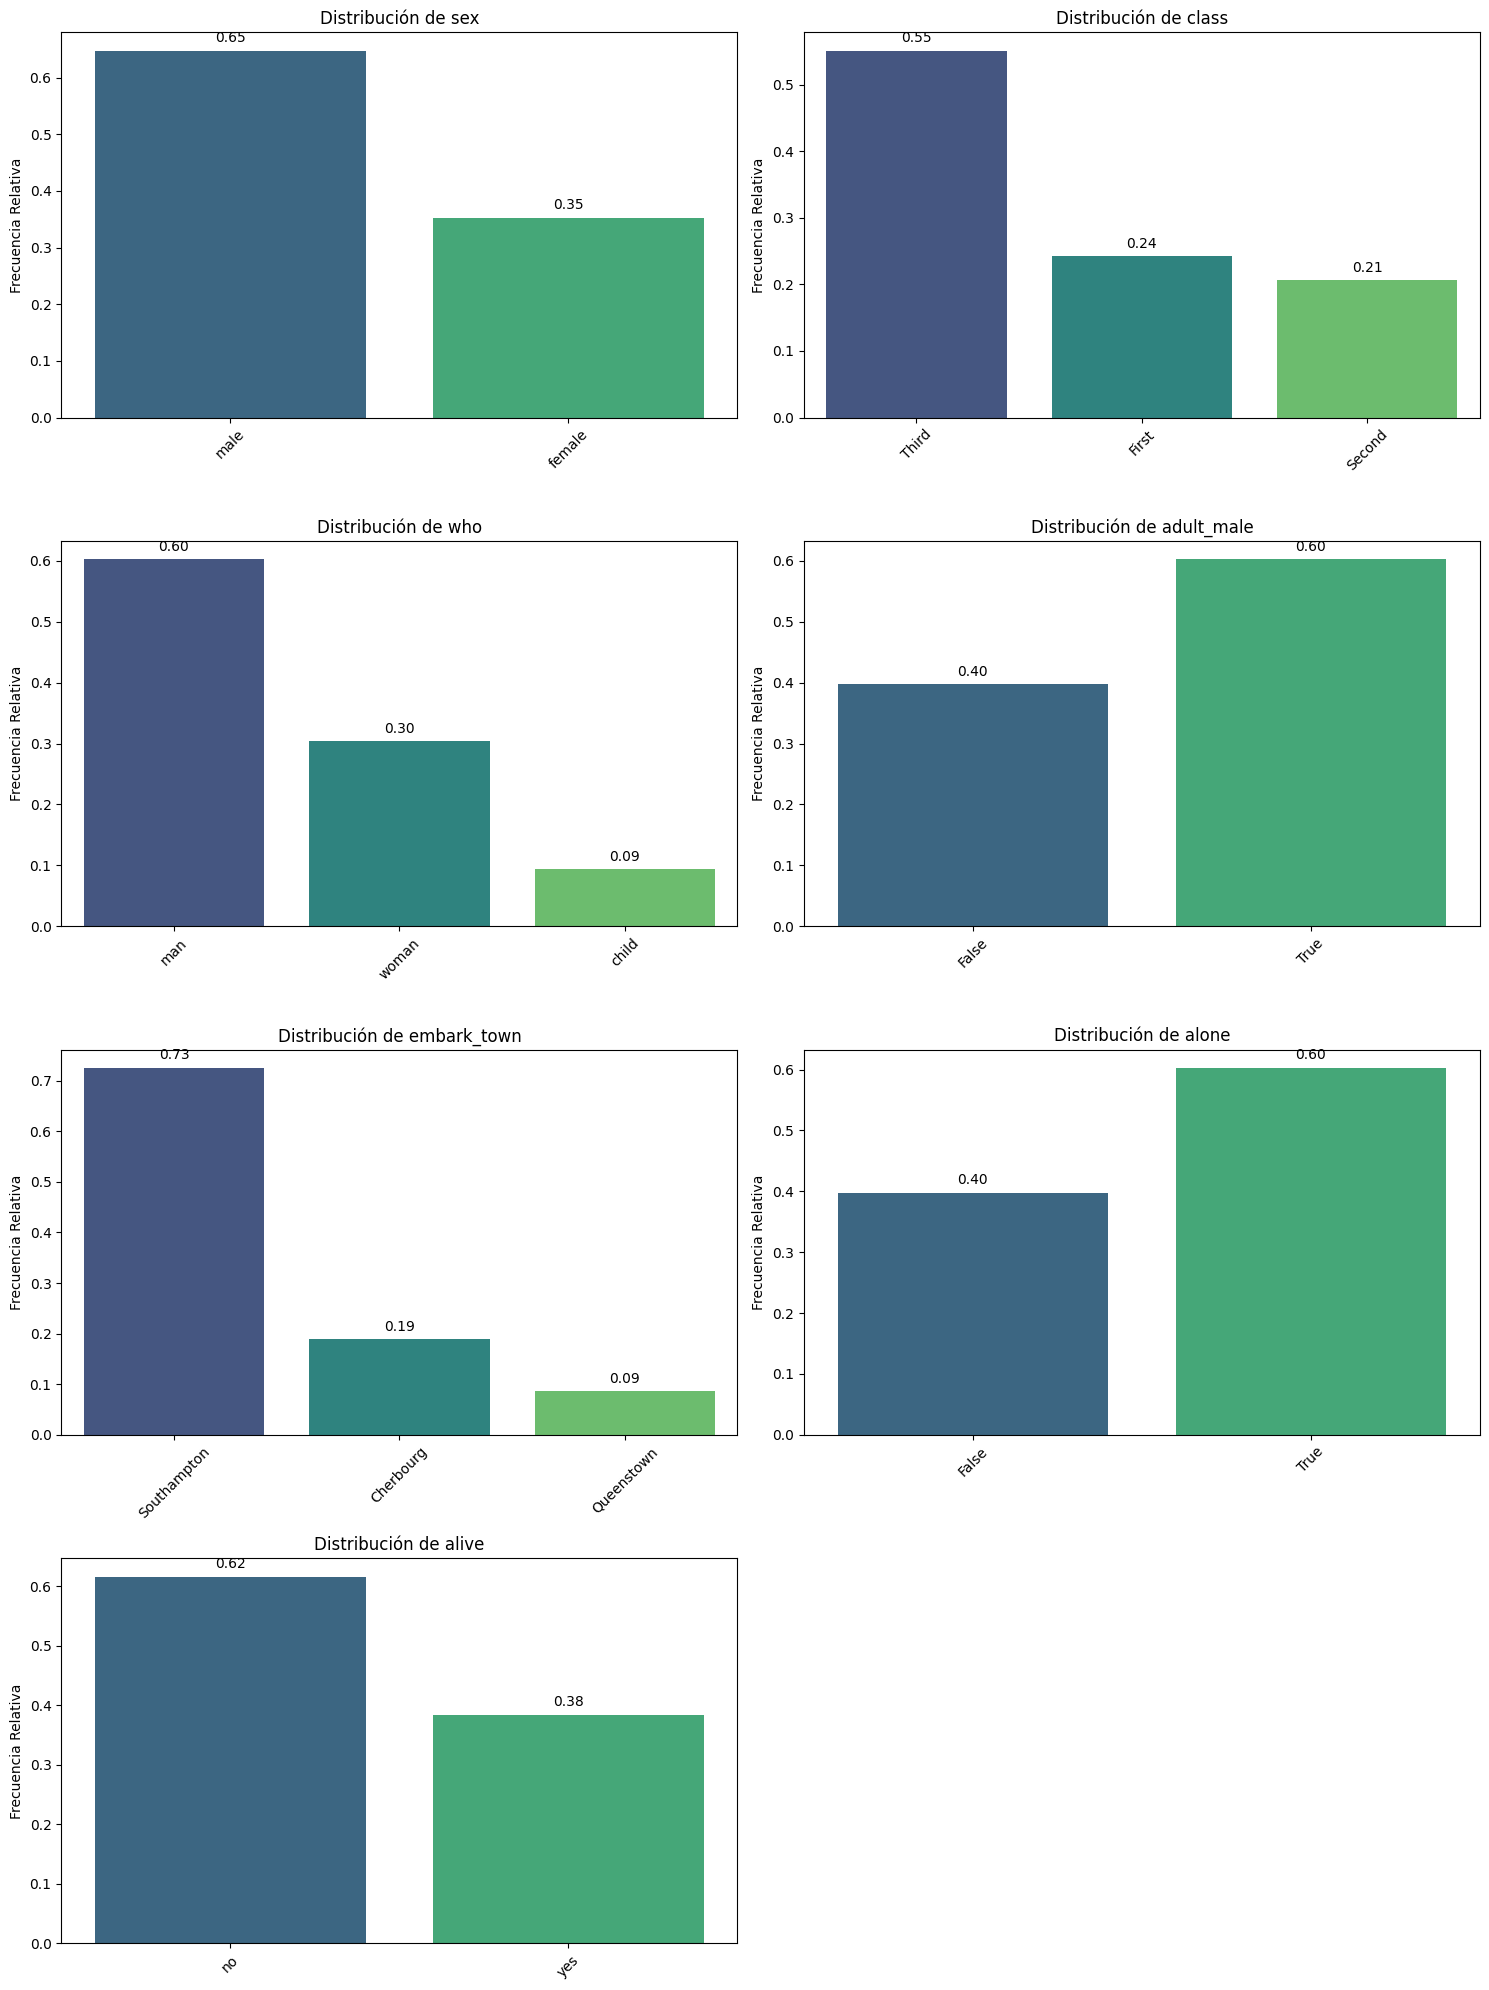

In [8]:
# Vamos a comparar todas las variables con la variable 'alive', que es realmente lo que nos interesa
# 1.- Comparar sus frecuencias tal como las obtuvimos en el univariante
boot.pinta_distribucion_categoricas(df_titanic, cat_titanic, relativa= True, mostrar_valores= True)

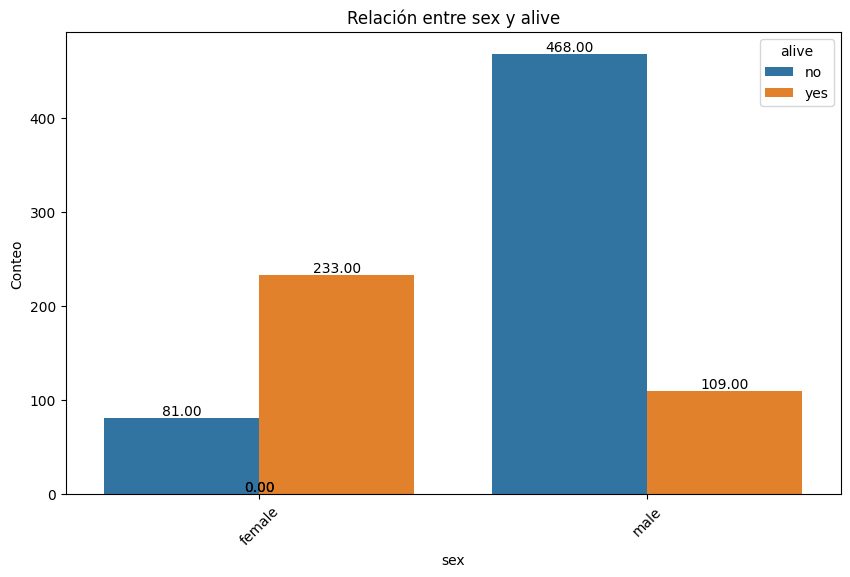

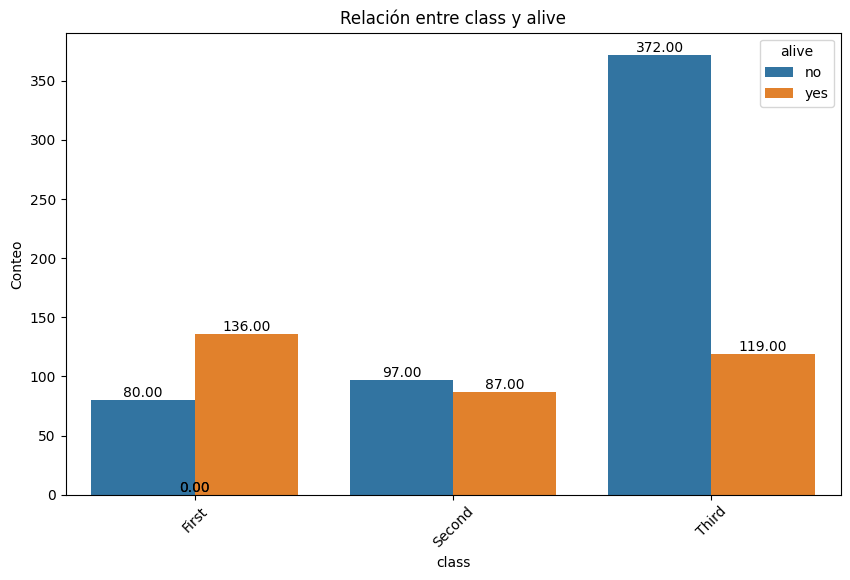

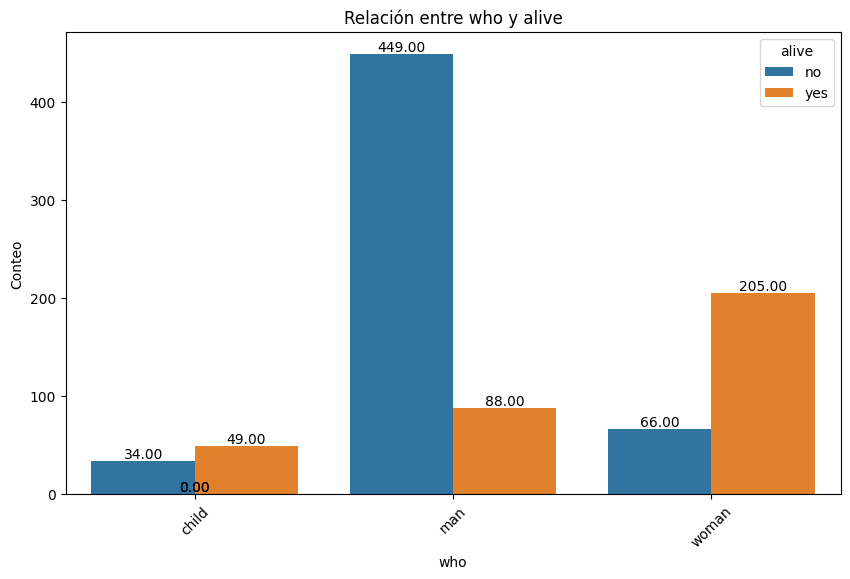

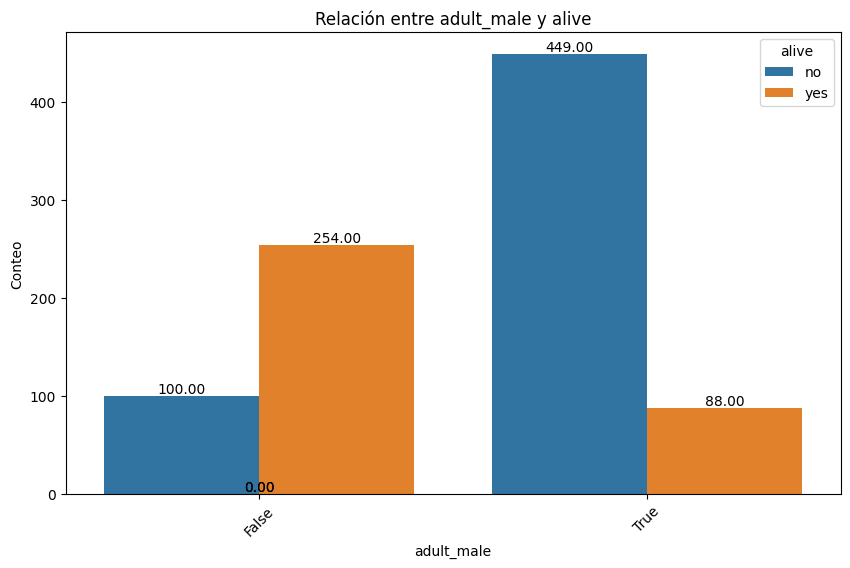

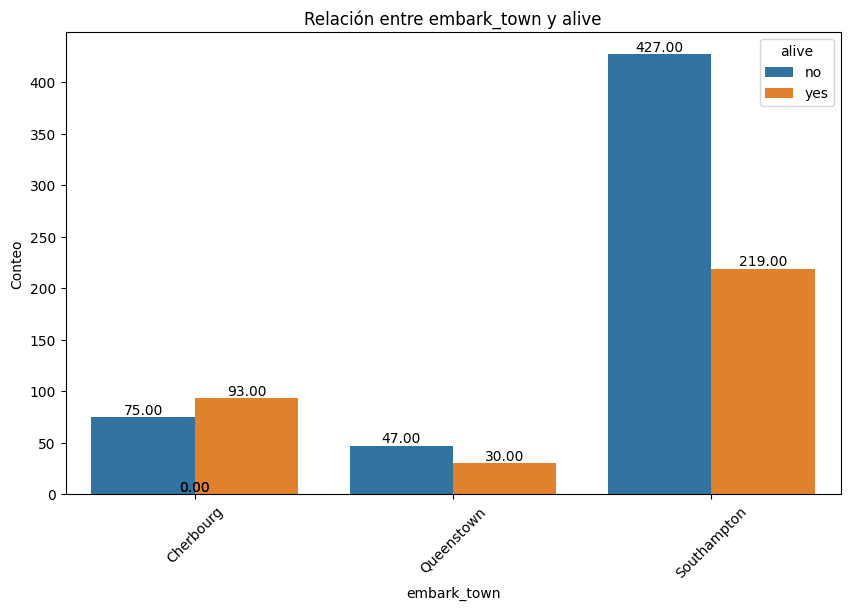

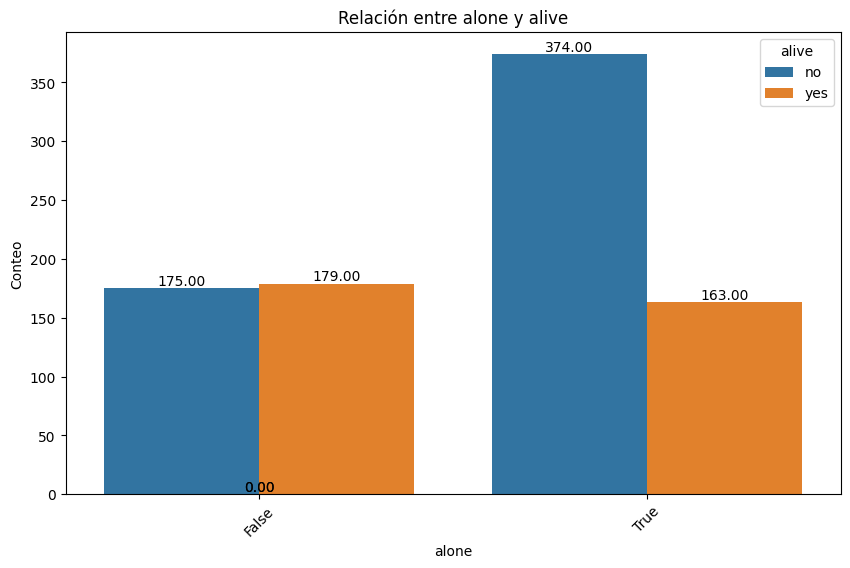

In [9]:
# 2.- Comparación con la variable más importante ('alive') como directora
for i in range(len(cat_titanic) - 1):
    col1 = cat_titanic[i]
    boot.plot_categorical_relationship_fin(df_titanic, col1,"alive", show_values= True)

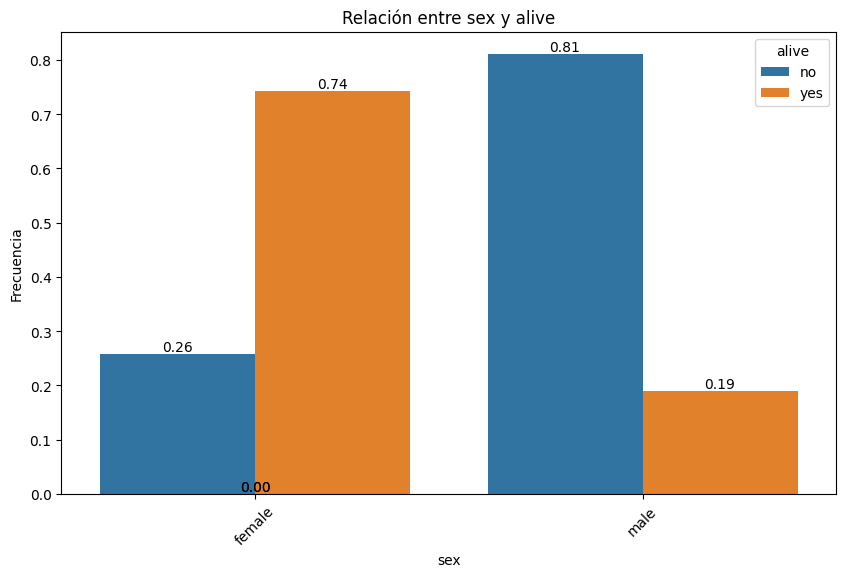

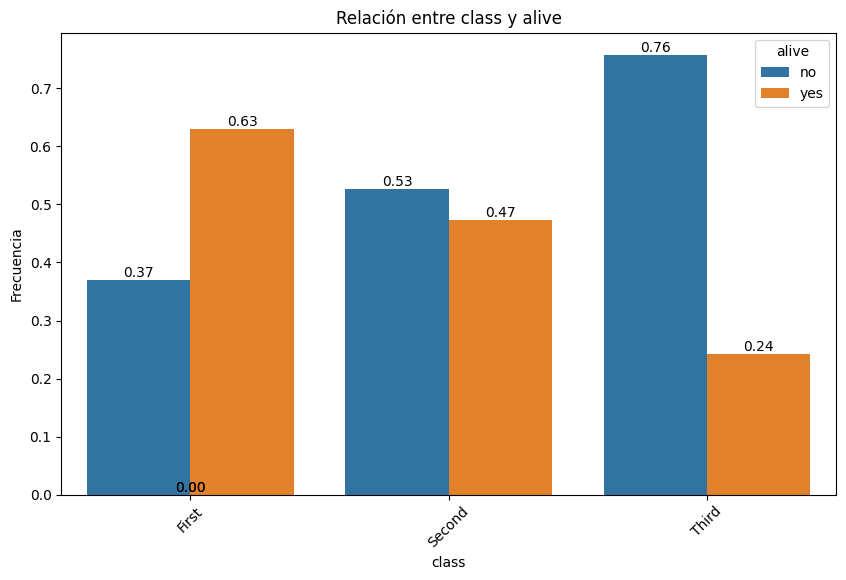

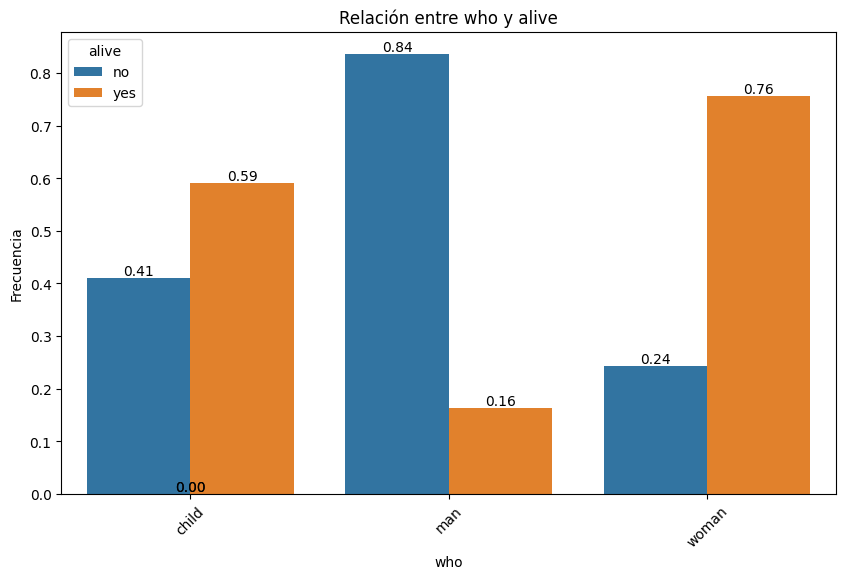

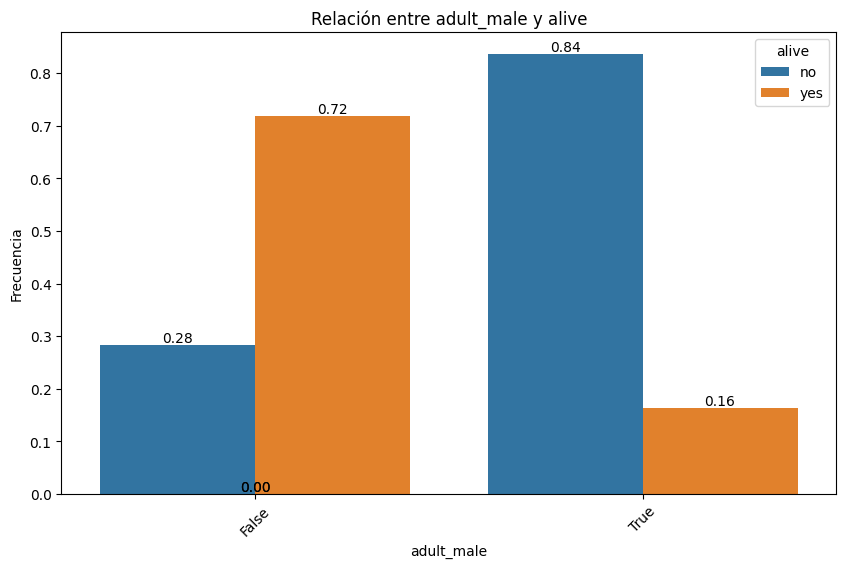

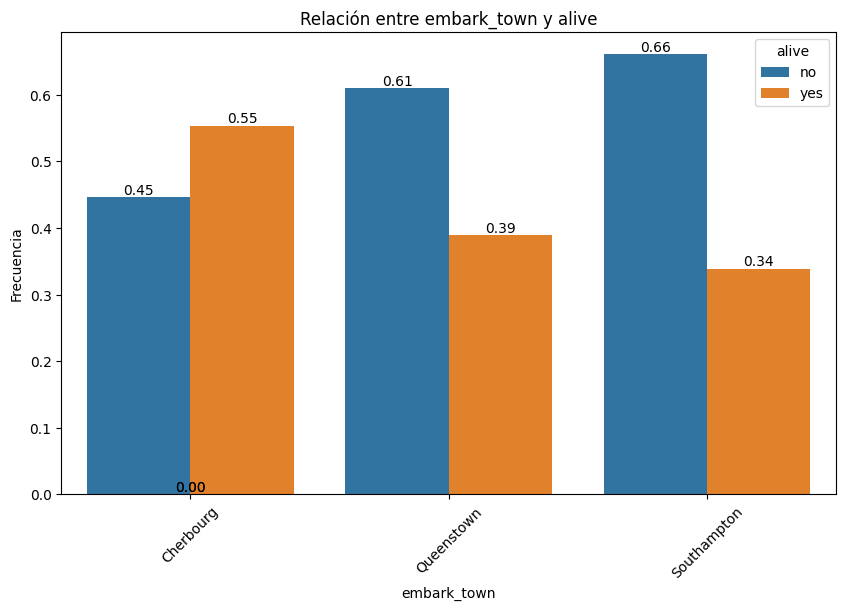

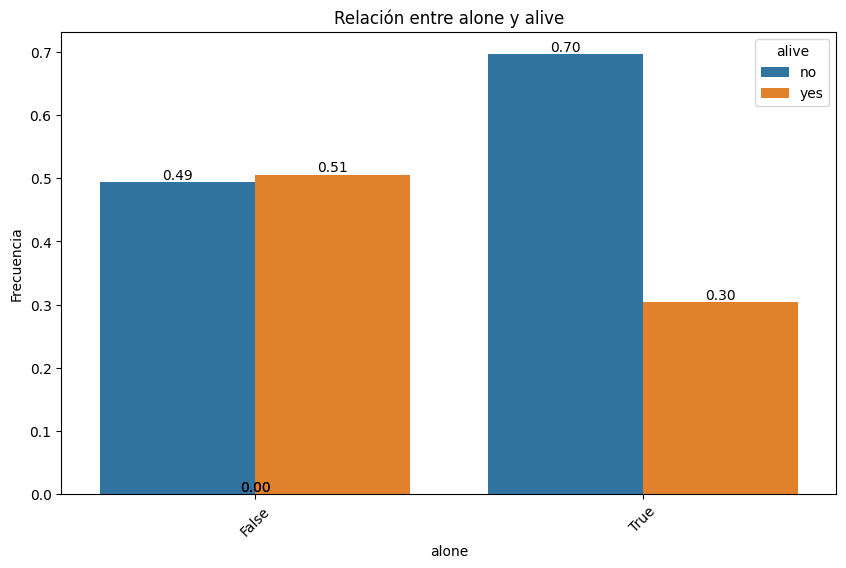

In [10]:
# 2.- Comparación con la variable más importante ('alive') como directora
for i in range(len(cat_titanic) - 1):
    col1 = cat_titanic[i]
    boot.plot_categorical_relationship_fin(df_titanic, col1,"alive", show_values= True, relative_freq=True)

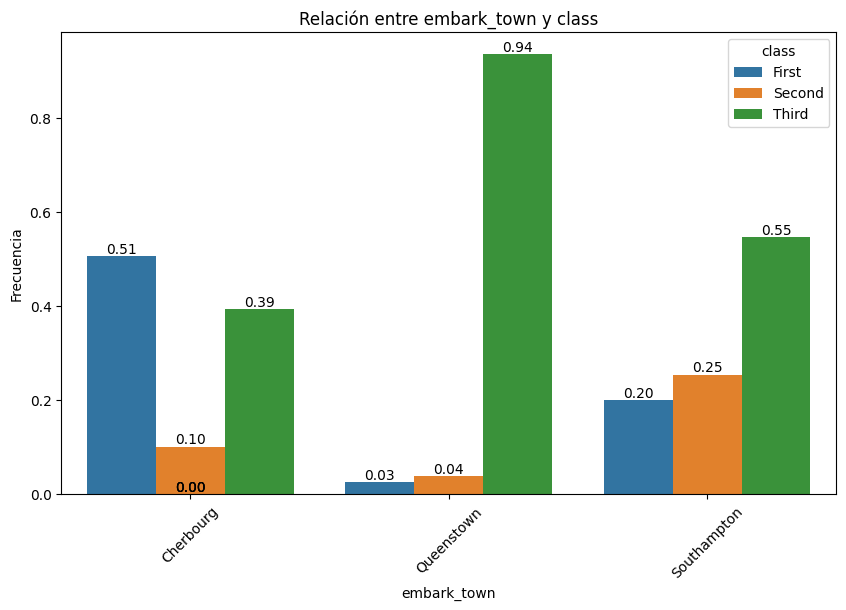

In [11]:
# Quiero investigar también la clase en la que viajaban en relación con el origen de embarcación
boot.plot_categorical_relationship_fin(df_titanic, "embark_town", "class", show_values= True, relative_freq=True)

#### Test Chi-Cuadrado

In [12]:
# Función para clasificar en adulto o niño
def classify_age(who):
    if who == 'child':
        return 'child'
    else:
        return 'adult'

# Crear la nueva columna 'adult_or_child'
df_titanic['adult_or_child'] = df_titanic['who'].apply(classify_age)

In [13]:
# 1.- Obtenemos la tabla de contingencia para cada variable (las frecuencias de aparición de la combinación de valores)
tabla_contingencia_adult_or_child = pd.crosstab(df_titanic['alive'], df_titanic['adult_or_child'])
tabla_contingencia_adult_or_child

adult_or_child,adult,child
alive,,
no,515,34
yes,293,49


In [14]:
# 2.- Aplicamos la prueba (utilizando la función adecuada del módulo scipy.stats) y mostramos los resultados
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_adult_or_child)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[497.85858586  51.14141414]
 [310.14141414  31.85858586]]


In [15]:
# 1.- Obtenemos la tabla de contingencia para cada variable (las frecuencias de aparición de la combinación de valores)
tabla_contingencia_who = pd.crosstab(df_titanic['alive'], df_titanic['who'])
tabla_contingencia_who

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [16]:
# 2.- Aplicamos la prueba (utilizando la función adecuada del módulo scipy.stats) y mostramos los resultados
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_who)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


In [17]:
# 1.- Obtenemos la tabla de contingencia para cada variable (las frecuencias de aparición de la combinación de valores)
tabla_contingencia_sex = pd.crosstab(df_titanic['alive'], df_titanic['sex'])
tabla_contingencia_sex

sex,female,male
alive,,
no,81,468
yes,233,109


In [18]:
# 2.- Aplicamos la prueba (utilizando la función adecuada del módulo scipy.stats) y mostramos los resultados
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_sex)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [19]:
# Ahora lo vemos para la clase
tabla_contingencia_class = pd.crosstab(df_titanic['alive'], df_titanic['class'])
tabla_contingencia_class

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [20]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_class)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [21]:
# Ahora lo vemos para la ciudad de embarque
tabla_contingencia_et = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])
tabla_contingencia_et

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,75,47,427
yes,93,30,219


In [22]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_et)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


- Vemos que todas tienen el P-value muy pequeño, por lo que podemos considerar que existe una relación estadísticamente significativa entre estas variables

<font color='green'>

### CONCLUSIONES - 1, 2, 3

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?   

    - Sobrevivieron más mujeres (205 frente a los 88 hombres y 49 niños).   

    - En términos relativos sobrevivieron el 76% de las mujeres, el 59% de los niños y tan solo el 16% de los hombres. Vemos cómo la supervivencia está totalmente ligada al sexo, o a ser adulto o niño.
    - La **mayoría de los pasajeros eran hombres**, constituyendo casi *dos tercios del total* del total, aunque la **mayoría de los supervivientes fueron mujeres**. Históricamente, se sabe que se priorizó la evacuación de mujeres y niños. La mayor parte de los hombres no sobrevivieron. Esto refleja las políticas de evacuación de la época.
    - Los **niños** constituían una **minoría significativa**, representando menos del 10% de los pasajeros, de los cuales casi el 60% fueron salvados.
    - Los **niños y mujeres tuvieron una mayor tasa de supervivencia** en comparación con los hombres, nuevamente debido a las prioridades de evacuación.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
    - En términos absolutos sobrevivieron más pasajeros de primera clase (136 personas).
    - En términos relativos el 63% de los pasajeros de primera clase sobrevivieron, frente al 47% de segunda clase y tan solo el 24% de tercera clase
    - Más de la mitad de los pasajeros viajaban en tercera clase, indicando una **predominancia de pasajeros de clase económica**. La primera clase tenía una representación significativa pero menor, con aproximadamente una cuarta parte de los pasajeros. La segunda clase tenía la menor cantidad de pasajeros entre las tres clases, con un 20.65%.

    - **Los pasajeros de primera clase tuvieron una mayor tasa de supervivencia** que aquellos en segunda y tercera clase. Esto puede deberse a su proximidad a los botes salvavidas y posiblemente a un mejor acceso a la información.

    - **La tercera clase experimentó la mayor mortalidad**. Suponemos que muchos pasajeros de tercera clase estaban alojados en la parte baja del barco, lo que dificultó su evacuación.

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?   

    - **La mayoría de los pasajeros embarcaron en Southampton**, representando más del 70% del total. Cherbourg y Queenstown tenían menos pasajeros, con Cherbourg representando casi el 19% y Queenstown menos del 9% (tiene sentido, ya que el Titanic es de procedencia británica).   
    
    - En términos relativos (aunque no absolutos), la mayoría de pasajeros que sobrevivieron habrían embarcado en Southampton. La no concordancia entre los resultados relativos y absolutos se debe a lo aclarado en el párrafo anterior, que más del 70% de los pasajeros habrían embarcado en Southampton. 
    - Seguramente esto se deba a que la mayoría de pasajeros que embarcaron en Southampton irían en tercera clase.
    - Como hemos visto con el test de Chi-Cuadrado, existe una relación estadísticamente muy significativa entre la ciudad de embarque y haber sobrevivido o no.

    </font>

#### Análisis categórica - numérica

In [23]:
num_titanic = [
    'fare',
    'age',
    'family_members'
]

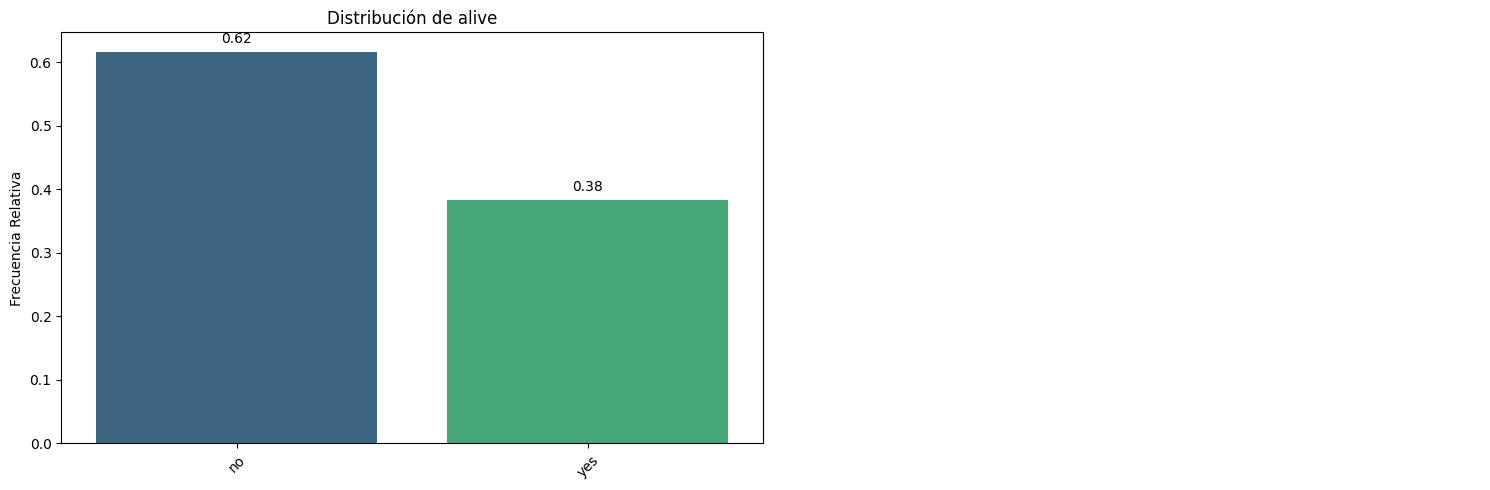

In [24]:
# 1.- Tener la referencia de la distribución de valores por separado de cada variable
# Esto ya lo hice más arriba, pero lo repito para tenerlo aquí a mano
boot.pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

In [25]:
df_titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [26]:
# Hay pasajeros que no pagaron el billete, veamos por qué
df_titanic[df_titanic['fare'] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult_or_child
179,male,36,0.0,Third,man,True,Southampton,no,True,0,adult
263,male,40,0.0,First,man,True,Southampton,no,True,0,adult
271,male,25,0.0,Third,man,True,Southampton,yes,True,0,adult
277,male,33,0.0,Second,man,True,Southampton,no,True,0,adult
302,male,19,0.0,Third,man,True,Southampton,no,True,0,adult
413,male,33,0.0,Second,man,True,Southampton,no,True,0,adult
466,male,33,0.0,Second,man,True,Southampton,no,True,0,adult
481,male,33,0.0,Second,man,True,Southampton,no,True,0,adult
597,male,49,0.0,Third,man,True,Southampton,no,True,0,adult
633,male,33,0.0,First,man,True,Southampton,no,True,0,adult


In [27]:
df_titanic[df_titanic['fare'] == 512.329200]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult_or_child
258,female,35,512.3292,First,woman,False,Cherbourg,yes,True,0,adult
679,male,36,512.3292,First,man,True,Cherbourg,yes,False,1,adult
737,male,35,512.3292,First,man,True,Cherbourg,yes,True,0,adult


<font color='green'>

### CONCLUSIONES - 5

5. Existen pasajeros que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

    - Todos los pasajeros que no pagaron el billete eran hombres de mediana edad (entre 19 y 49 años) que viajaban solos. Estaban todos muy distribuidos entre las 3 clases y todos ellos embarcaron en Shouthampton.   
    
    - Puedo suponer que los de **primera-segunda clase serían invitados** por algún alto cargo del trasatlántico **o niños pequeños**, mientras que los de **tercera clase** puede ser que fueran **trabajadores**.
    - Hubo 3 pasajeros (2 hombres y 1 mujer) que se gastaron 512.3292. Los 3 embarcaron en Cherbourg, viajaban en primera clase y todos ellos sobrevivieron.

</font>

In [28]:
df_titanic['age'].describe()
# Hay pasajeros recién nacidos

count    891.000000
mean      30.279461
std       13.068334
min        0.000000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [29]:
df_titanic['family_members'].describe()
# La mayoría de pasajeros viajaban solos

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: family_members, dtype: float64

(3, 2)


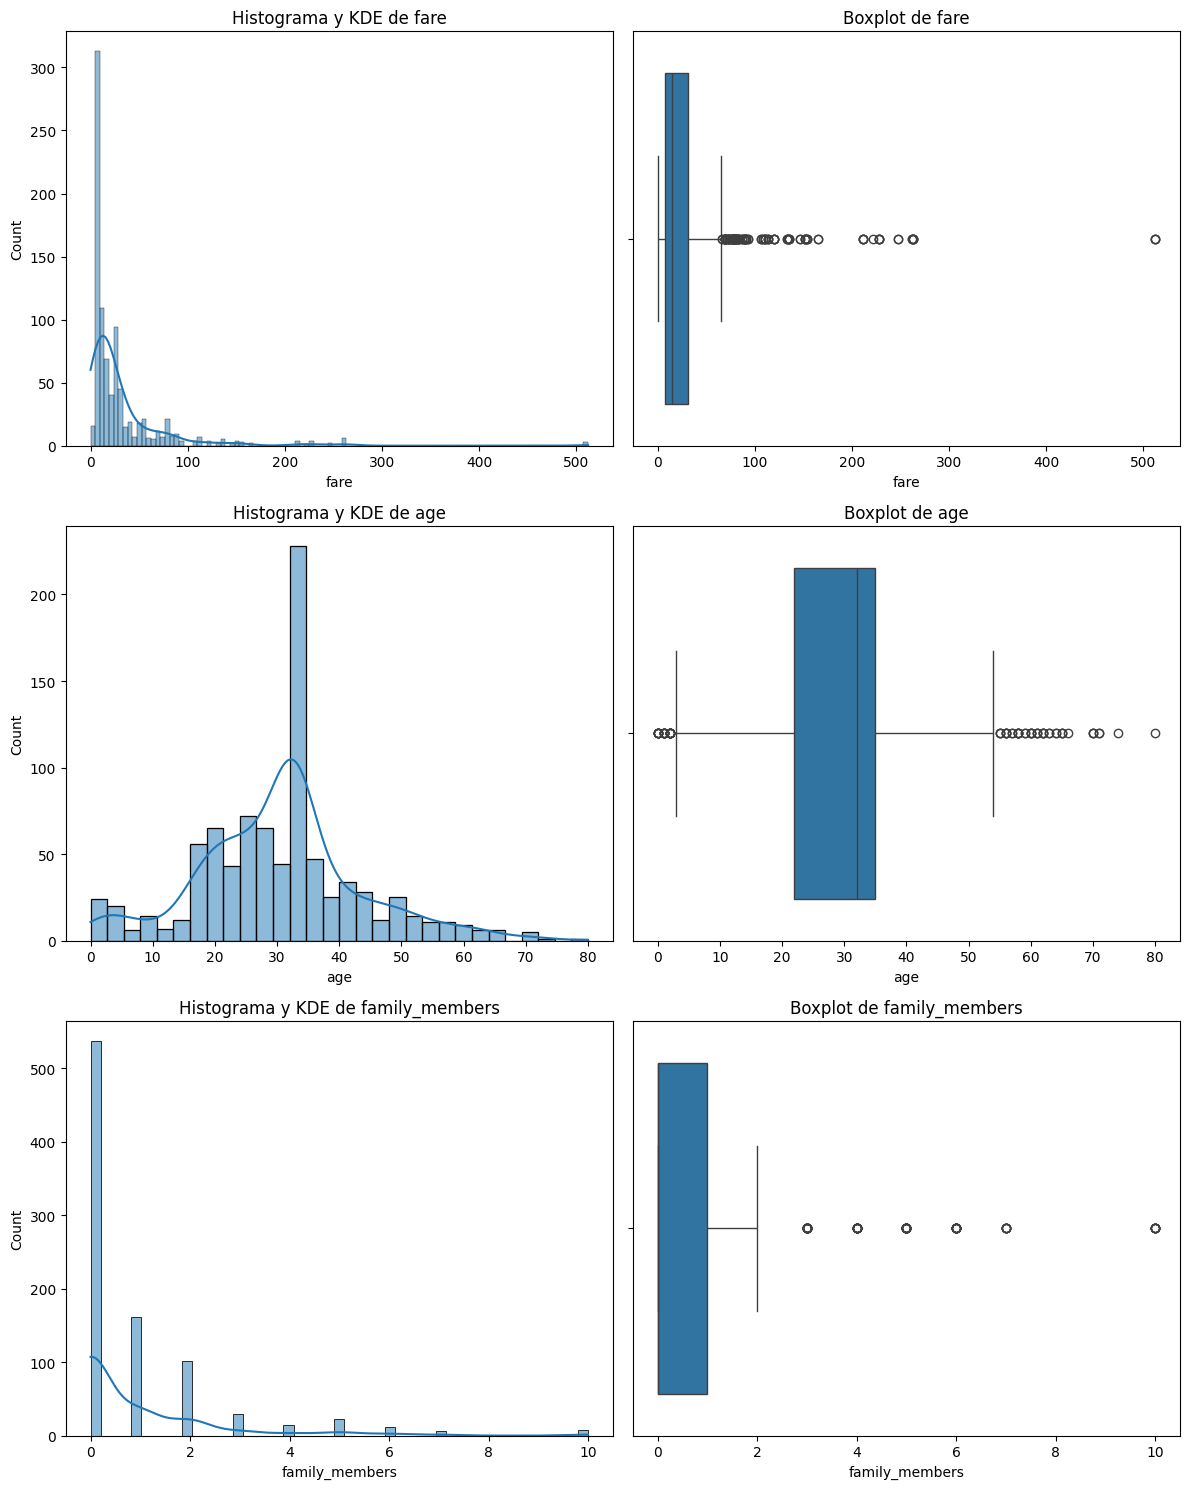

In [30]:
boot.plot_combined_graphs(df_titanic, num_titanic)

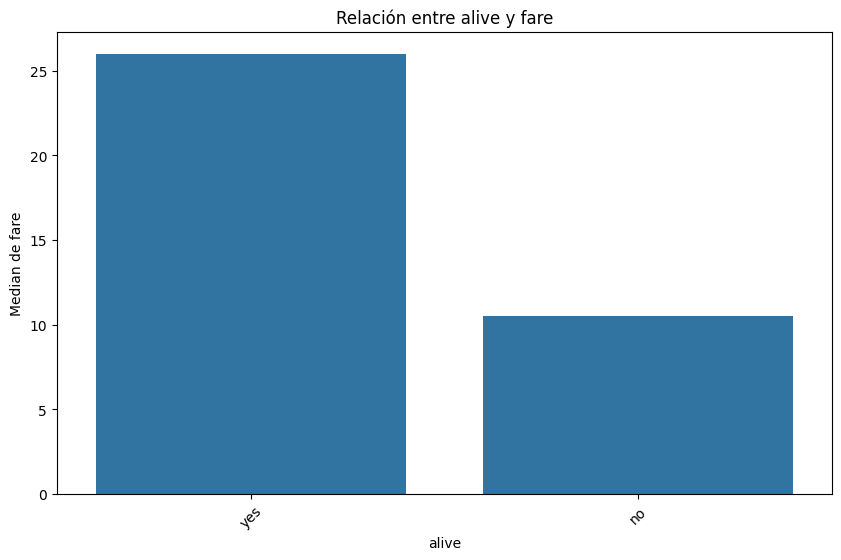

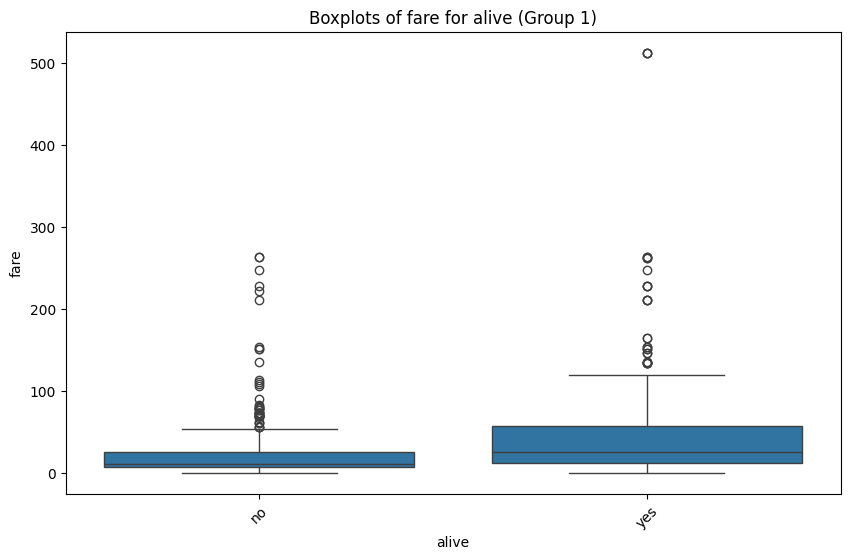

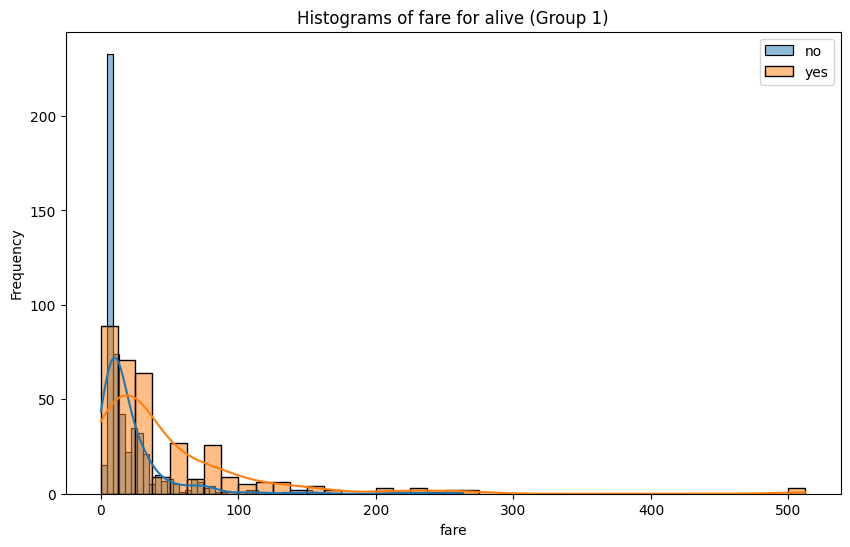

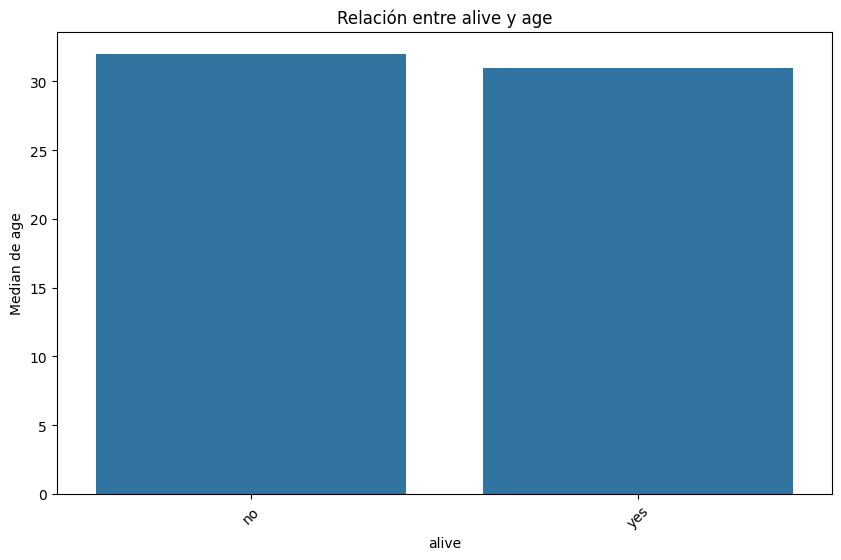

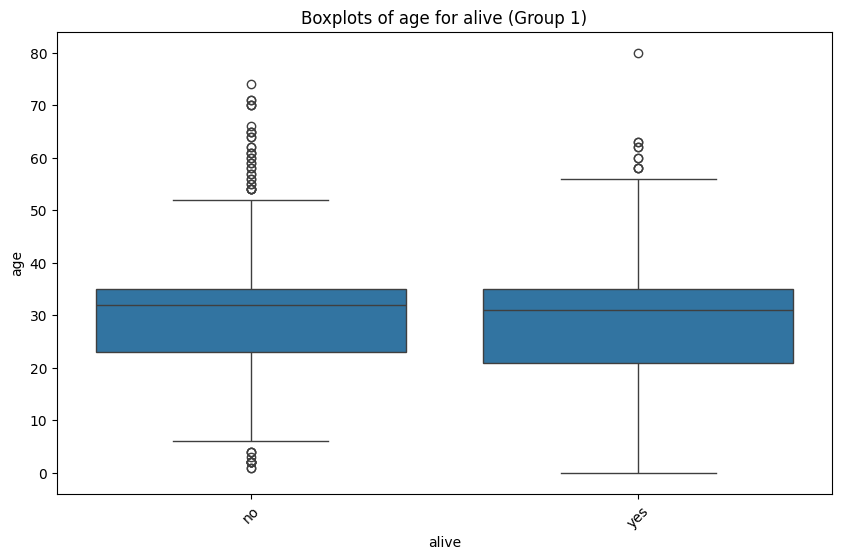

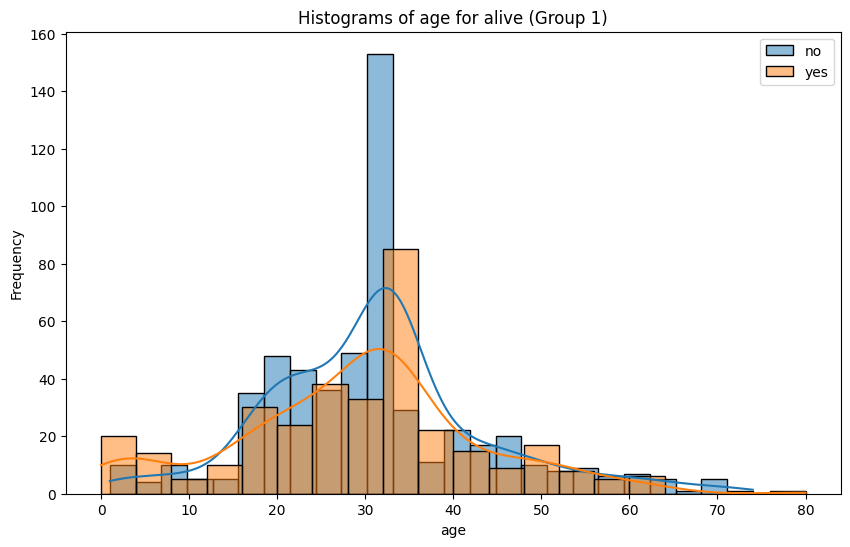

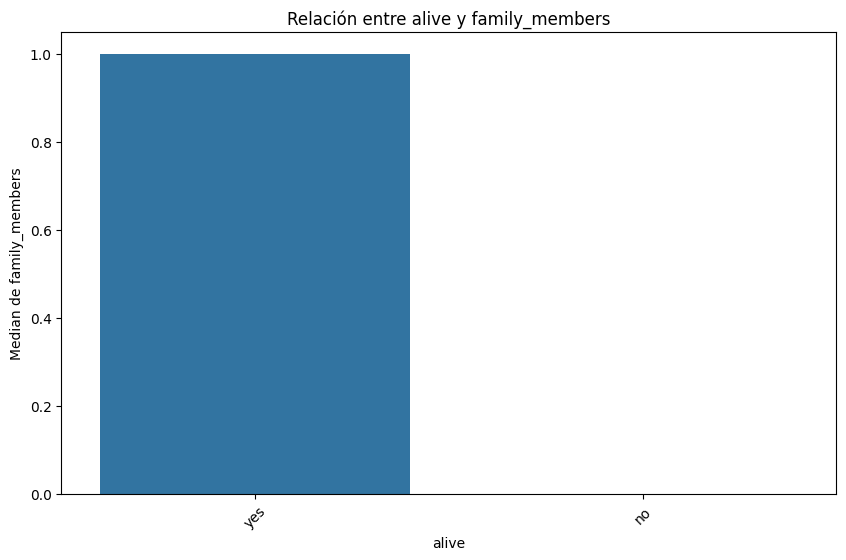

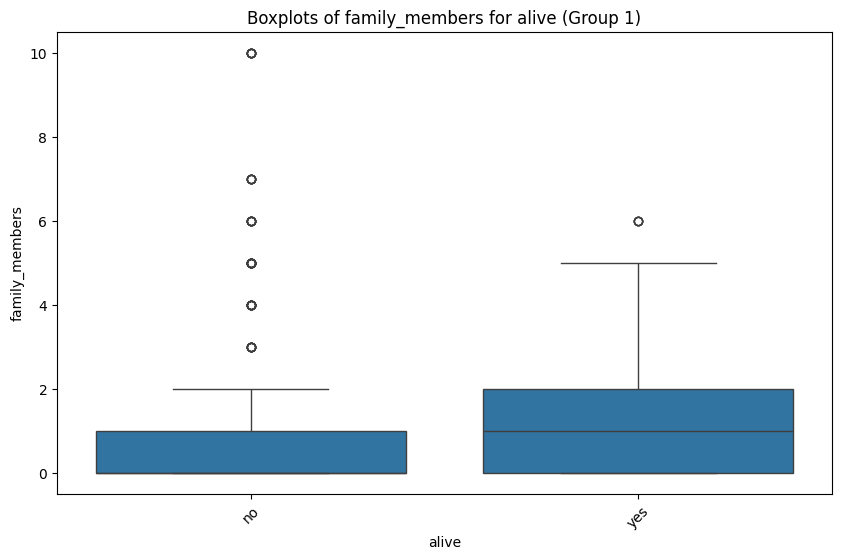

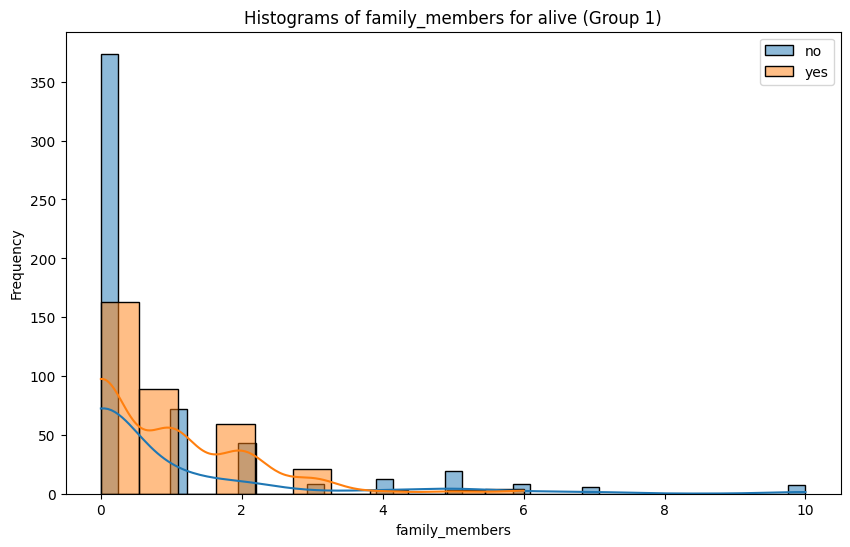

In [31]:
# 2.- Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica.
# Mediana:
for i in range(len(num_titanic)):
    col1 = num_titanic[i]
    boot.plot_categorical_numerical_relationship(df_titanic, "alive", col1, measure = "median")
    boot.plot_grouped_boxplots(df_titanic,"alive",col1)
    boot.plot_grouped_histograms(df_titanic,"alive", col1, 2)

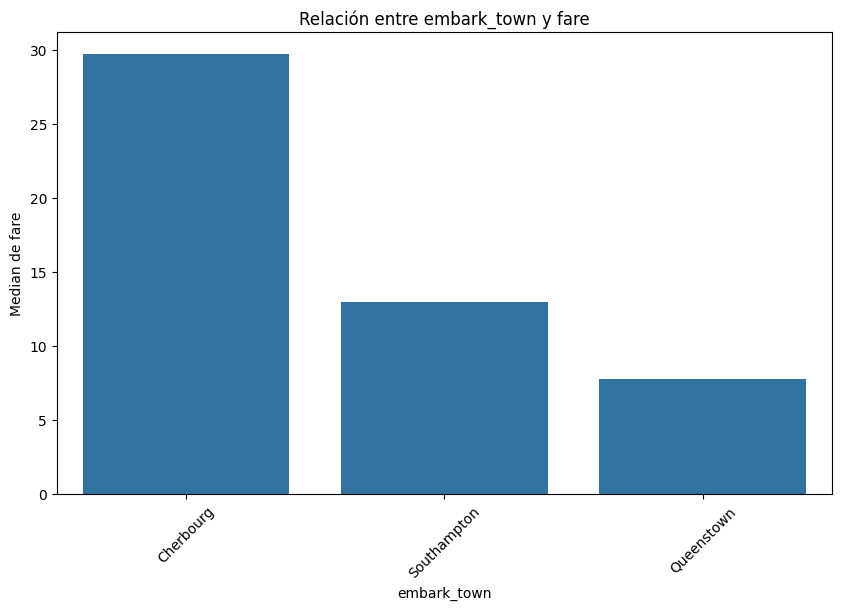

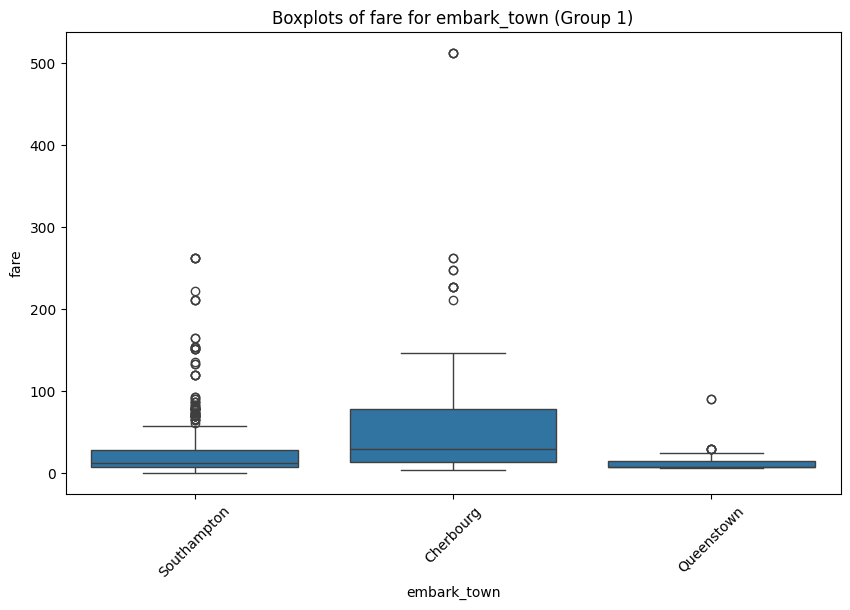

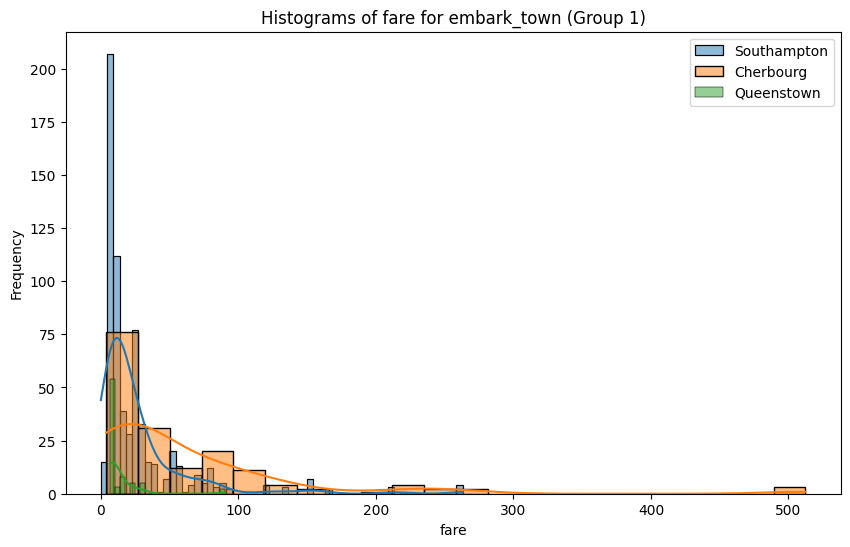

In [32]:
# Quiero ver también la relación entre dinero pagado y ciudad de embarque
boot.plot_categorical_numerical_relationship(df_titanic, "embark_town", "fare", measure = "median")
boot.plot_grouped_boxplots(df_titanic,"embark_town","fare")
boot.plot_grouped_histograms(df_titanic,"embark_town", "fare", 3)

<font color='green'>

### CONCLUSIONES - 4

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
- La **tarifa promedio** pagada por los pasajeros era de **32.20**, pero la mediana era significativamente más baja (14.45), indicando una **distribución sesgada con algunas tarifas muy altas**, lo que se puede ver también gracias a la alta desviación estándar.
- Gracias a la prueba U de Mann-Whitney, nos hemos dado cuenta de que existe una relación muy estrecha entre el precio del pasaje y la supervivencia. A mayor precio, mayor probabilidad de sobrevivir (suponemos porque a mayor precio, mejor clase)

</font>

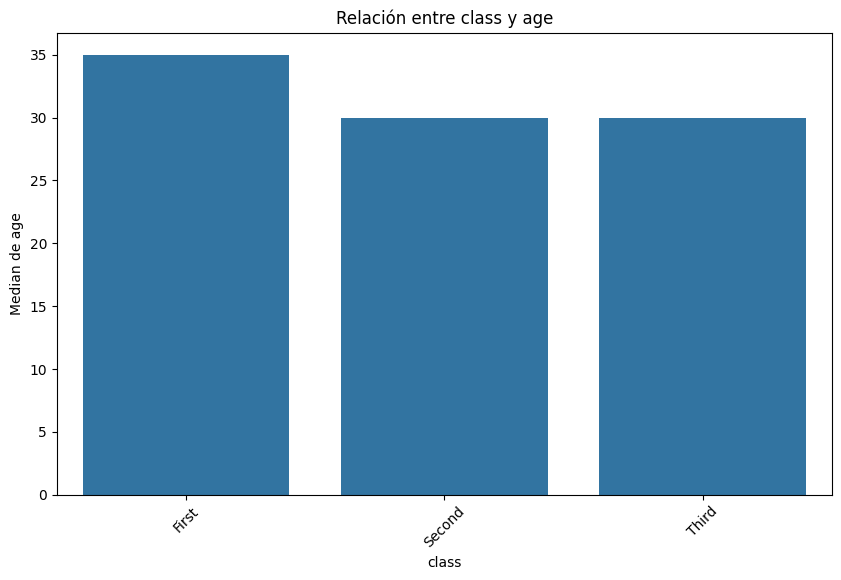

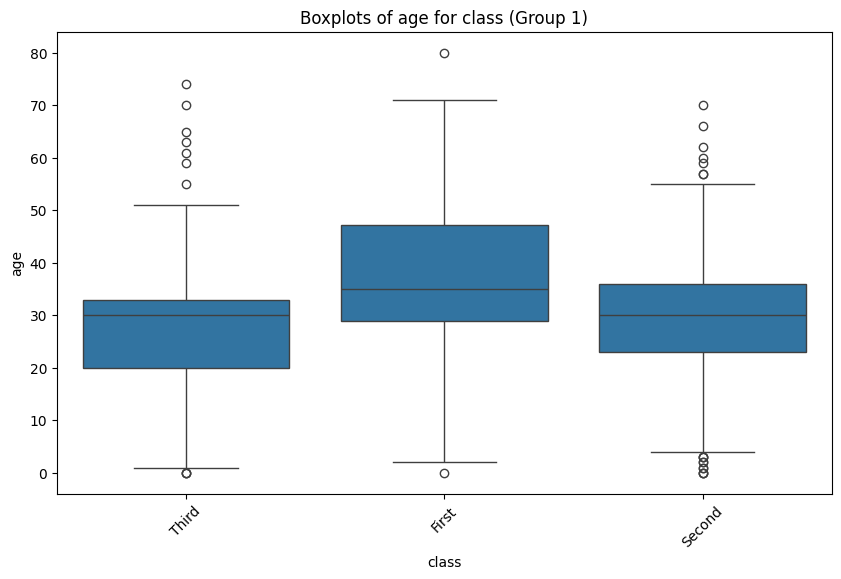

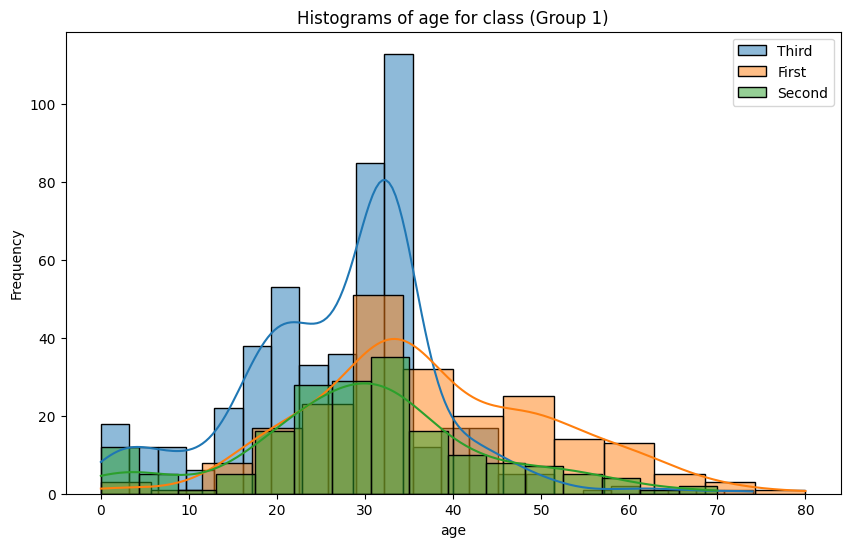

In [33]:
# Quiero ver también la relación entre clase y edad
boot.plot_categorical_numerical_relationship(df_titanic, "class", "age", measure = "median")
boot.plot_grouped_boxplots(df_titanic,"class","age")
boot.plot_grouped_histograms(df_titanic,"class", "age", 3)

#### Prueba U de Mann-Whitney

In [34]:
from scipy.stats import mannwhitneyu

# Primero lo vemos entre 'age' y 'alive'
# 1.- Separar los datos en dos grupos según la variable categórica
grupo_a = df_titanic.loc[df_titanic.alive == "yes","age"]
grupo_b = df_titanic.loc[df_titanic.alive == "no","age"]

# 2.- Aplicar la prueba y mostrar los resultados
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 85805.0
Valor p: 0.030299910093093907


- Como p-value < 0.05, podemos decir que hay relación entre las dos variables.

In [35]:
# Ahora entre 'family_members' y 'alive'
# 1.- Separar los datos en dos grupos según la variable categórica
grupo_a = df_titanic.loc[df_titanic.alive == "yes","family_members"]
grupo_b = df_titanic.loc[df_titanic.alive == "no","family_members"]

# 2.- Aplicar la prueba y mostrar los resultados
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 110099.0
Valor p: 7.970801270915872e-07


- Como p-value << 0.05, podemos decir que hay mucha relación entre las dos variables y podemos extrapolar esa condición a otro conjuto de pasajeros con datos similares.

In [36]:
# Ahora entre 'fare' y 'alive'
# 1.- Separar los datos en dos grupos según la variable categórica
grupo_a = df_titanic.loc[df_titanic.alive == "yes","fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no","fare"]

# 2.- Aplicar la prueba y mostrar los resultados
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


- Como p-value << 0.05, podemos decir que hay mucha relación entre las dos variables y podemos extrapolar esa condición a otro conjuto de pasajeros con datos similares.

#### Multivariable

In [37]:
# Voy a estudiar la relación entre la supervivencia, el dinero pagado y la ciudad de embarque

# Para esto vamos a agrupar primero los pasajeros por dinero pagado y ciudad.

# Creamos una columna por categorías de edad
bins_fare = [0, 8, 15, 30, 513]
labels_fare = ['0-8', '8.1-15', '15.01-30', '30.01+']
df_titanic['fare_group'] = pd.cut(df_titanic['fare'], bins_fare, labels=labels_fare, right=False)
df_titanic.head(5)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult_or_child,fare_group
0,male,22,7.2500,Third,man,True,Southampton,no,False,1,adult,0-8
1,female,38,71.2833,First,woman,False,Cherbourg,yes,False,1,adult,30.01+
2,female,26,7.9250,Third,woman,False,Southampton,yes,True,0,adult,0-8
3,female,35,53.1000,First,woman,False,Southampton,yes,False,1,adult,30.01+
4,male,35,8.0500,Third,man,True,Southampton,no,True,0,adult,8.1-15


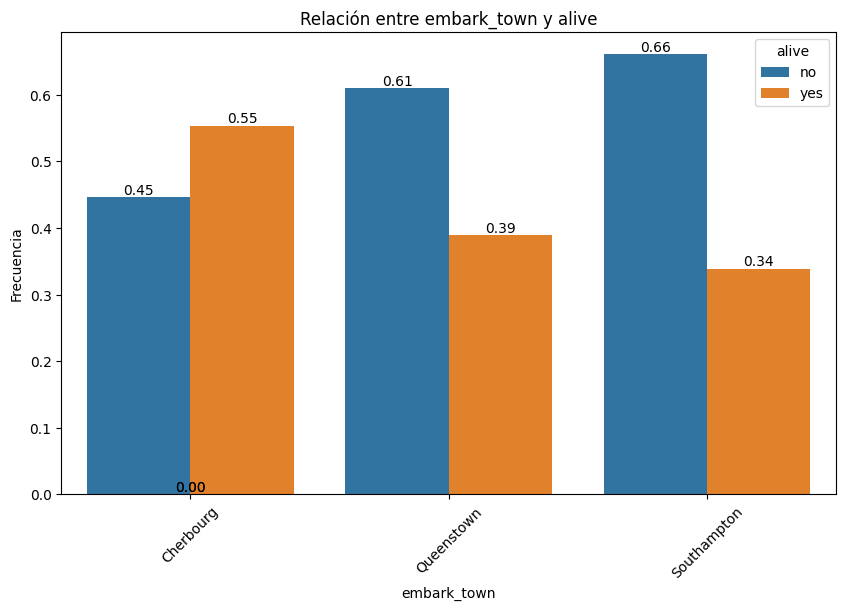

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


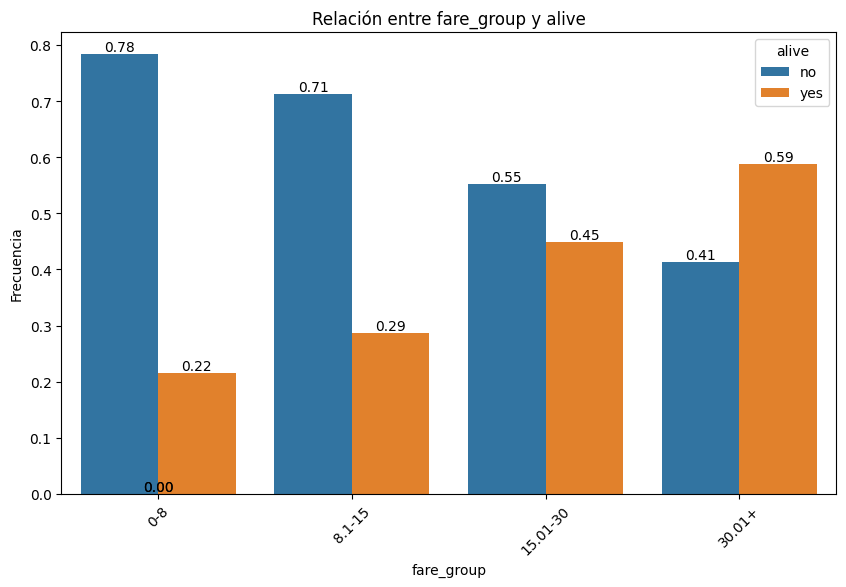

In [38]:
# Mi variable directora es 'alive'

# 1.- Muestro el bivariante de cada una con las otras dos
boot.plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq= True, show_values=True)
boot.plot_categorical_relationship_fin(df_titanic,"fare_group", "alive", relative_freq= True, show_values=True, size_group=len(bins_fare))

Respuesta no:


c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


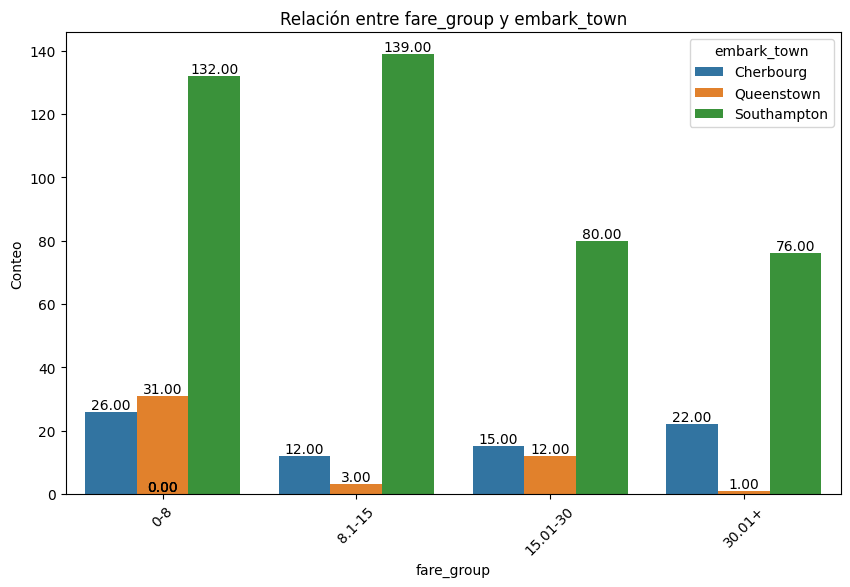

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


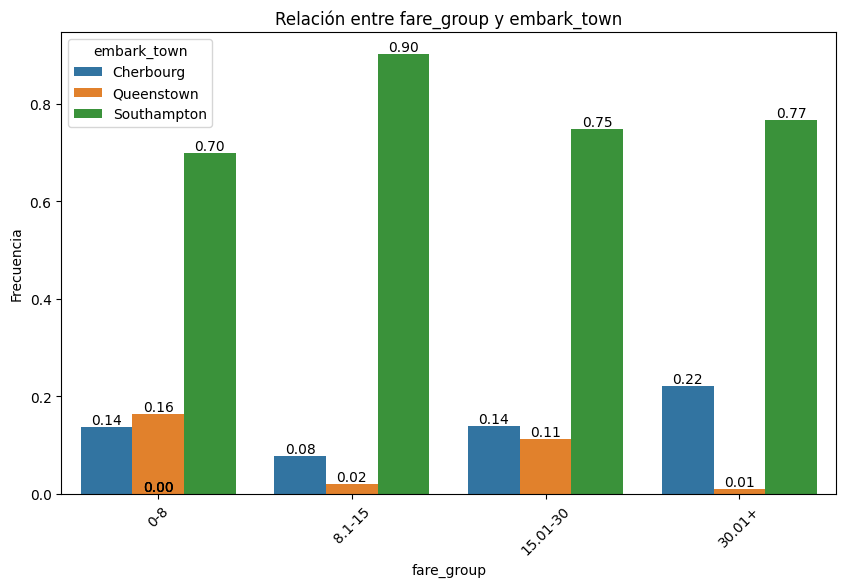

Respuesta yes:


c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


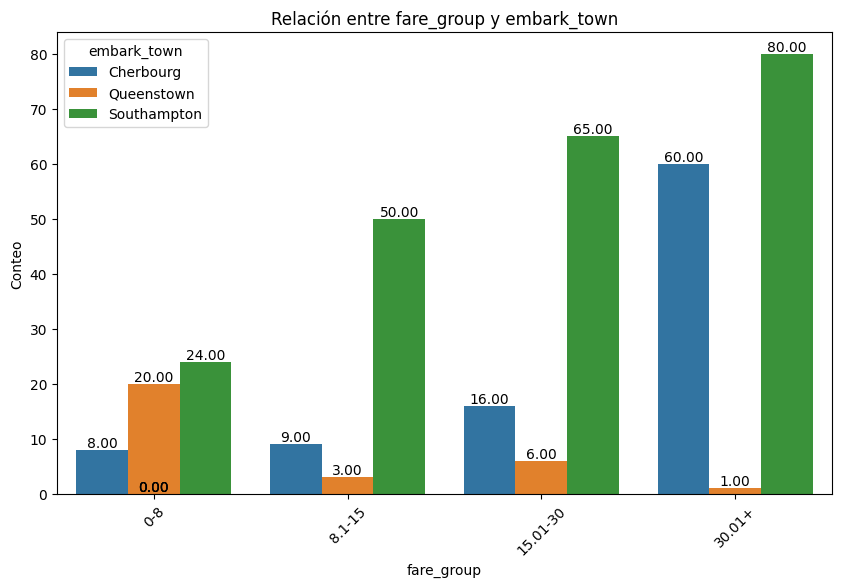

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


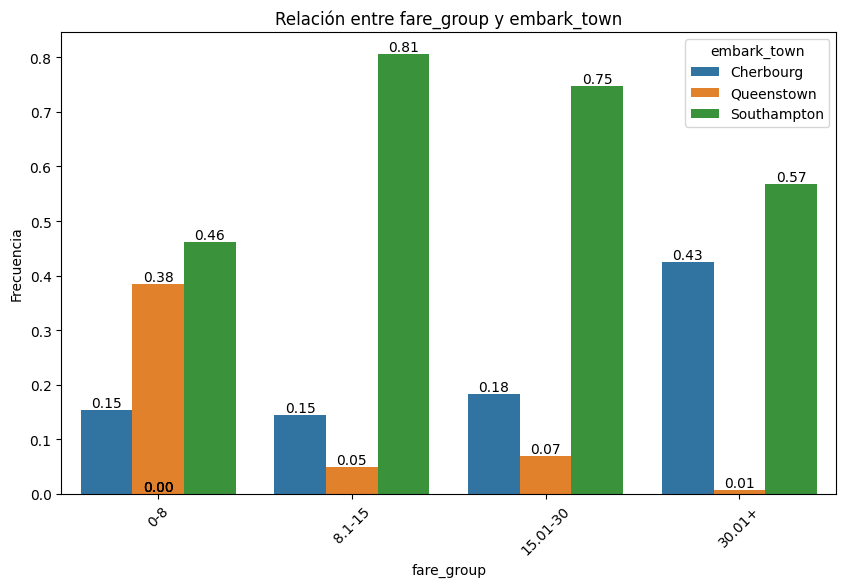

In [39]:
# 2.- Divido mi dataset en tantos subdatasets como valores de mi categórica directora
columnas = ["alive","embark_town","fare_group"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

# 3.- Hago un análsis bivariante para cada subdataset y comparo todo
for valor, df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    boot.plot_categorical_relationship_fin(df_datos,col_2,col_1, show_values= True, size_group=len(bins_fare))
    boot.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group=len(bins_fare))
    

<font color='green'>

### CONCLUSIONES - 6

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

    - Sí. En porcentajes, la mayoría de gente que embarcó en Cherbourg había pagado 30.01+, y fueron los que mayor porcentaje de supervivencia tuvieron.   
    
    - Existe una relación positiva entre la cantidad de dinero pagada y la probabilidad de supervivencia, especialmente notable en Cherbourg. Los pasajeros que pagaron tarifas más altas son los que más sobrevivieron (Esto puede deberse a que las tarifas más altas están asociadas con la primera clase).
    - Los pasajeros de Queenstown, aunque pagaron tarifas más bajas en promedio, también muestran una ligera diferencia en la tasa de supervivencia.

</font>

In [40]:
# Voy a estudiar ahora la relación entre la supervivencia, la edad y la clase

# Para esto vamos a agrupar primero los pasajeros por clase y edad.

# Creamos una columna por categorías de edad
bins_age = [0, 12, 18, 35, 60, 80]
labels_age = ['0-12', '13-18', '19-35', '36-60', '60+']
df_titanic['age_group'] = pd.cut(df_titanic['age'], bins_age, labels=labels_age, right=False)
df_titanic.head(5)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult_or_child,fare_group,age_group
0,male,22,7.2500,Third,man,True,Southampton,no,False,1,adult,0-8,19-35
1,female,38,71.2833,First,woman,False,Cherbourg,yes,False,1,adult,30.01+,36-60
2,female,26,7.9250,Third,woman,False,Southampton,yes,True,0,adult,0-8,19-35
3,female,35,53.1000,First,woman,False,Southampton,yes,False,1,adult,30.01+,36-60
4,male,35,8.0500,Third,man,True,Southampton,no,True,0,adult,8.1-15,36-60


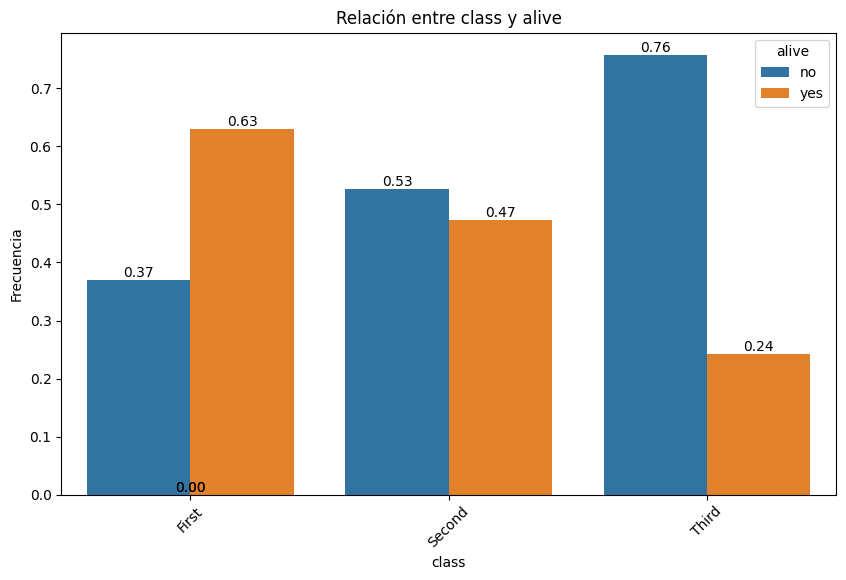

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


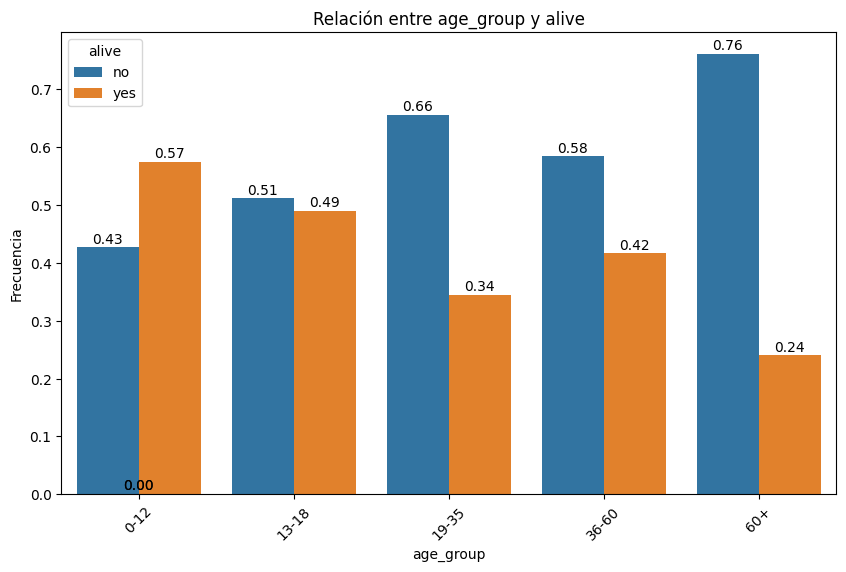

In [41]:
# Mi variable directora es 'alive'

# 1.- Muestro el bivariante de cada una con las otras dos
boot.plot_categorical_relationship_fin(df_titanic,"class","alive", relative_freq= True, show_values=True)
boot.plot_categorical_relationship_fin(df_titanic,"age_group", "alive", relative_freq= True, show_values=True, size_group=len(bins_age))

Respuesta no:


c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


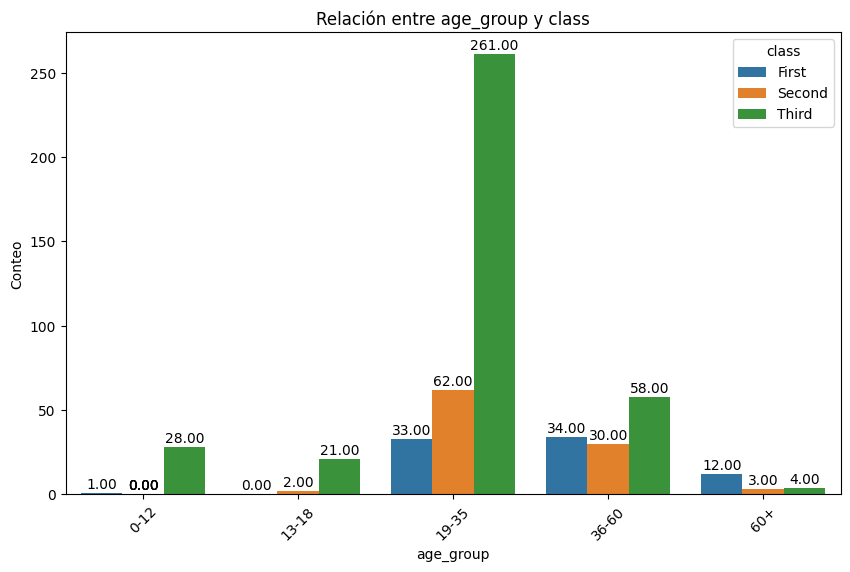

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


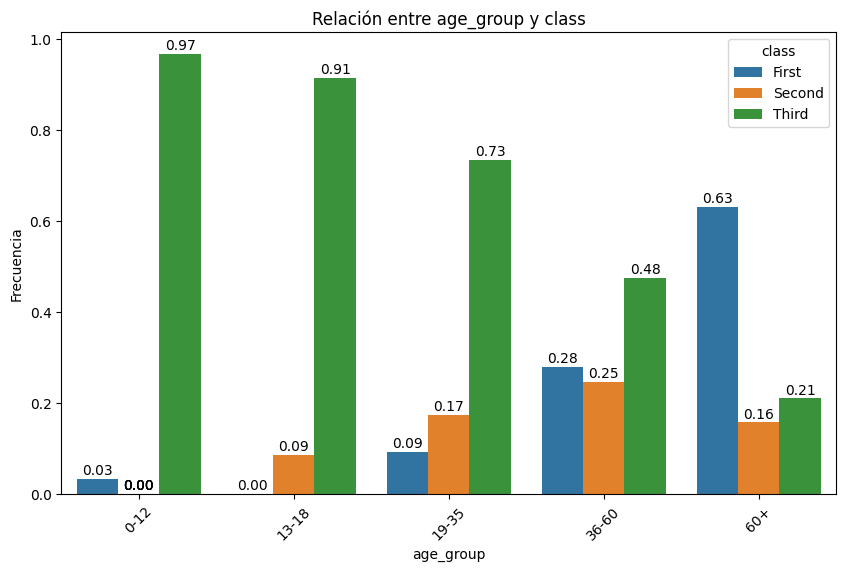

Respuesta yes:


c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


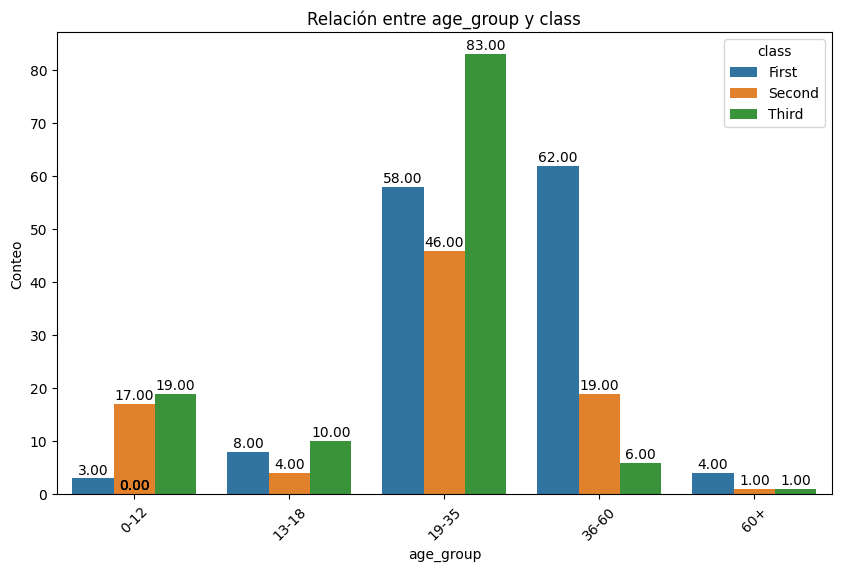

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


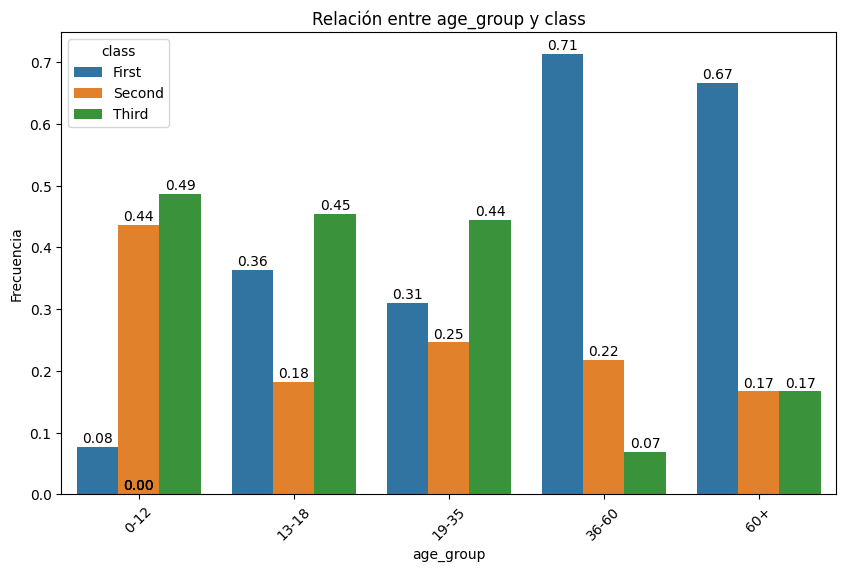

In [42]:
# 2.- Divido mi dataset en tantos subdatasets como valores de mi categórica directora
columnas = ["alive","class","age_group"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

# 3.- Hago un análsis bivariante para cada subdataset y comparo todo
for valor, df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    boot.plot_categorical_relationship_fin(df_datos,col_2,col_1, show_values= True, size_group=len(bins_age))
    boot.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group=len(bins_age))
    

<font color='green'>

### CONCLUSIONES - 7


7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?   

    - En términos absolutos sobrevivieron sobre todo los pasajeros con una edad comprendida entre 19 y 35 años que viajaban en tercera clase.   

    - En términos absolutos sobrevivieron sobre todo los pasajeros con una edad comprendida entre 36 y 60 que viajaban en primera clase.
    - **Primera Clase**: Los pasajeros en primera clase generalmente tenían **tasas de supervivencia más altas** en comparación con los de segunda y tercera clase, **especialmente los adultos de mediana edad (36-60 y 60+)**
    - **Segunda Clase**: Los **niños (0-12)** en segunda clase tenían altas tasas de supervivencia.
    - **Tercera Clase**: La tercera clase tuvo las tasas de supervivencia más bajas en general, con los **adultos mayores (36-60 y 60+) enfrentando las peores tasas**.

</font>

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


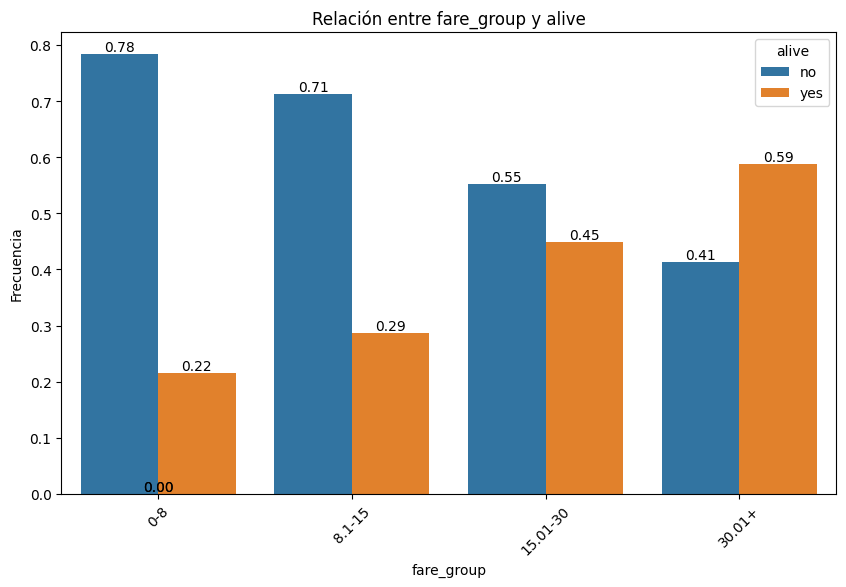

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


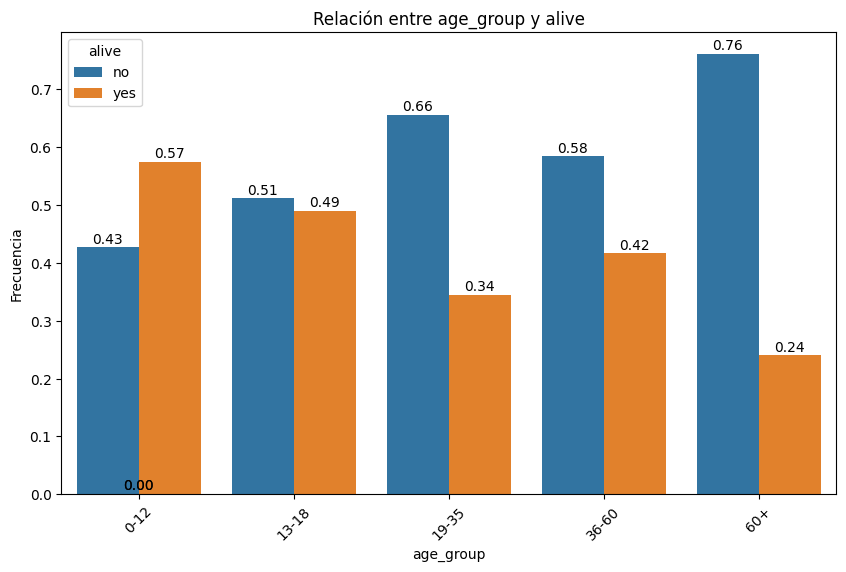

In [43]:
# Voy a estudiar ahora la relación entre la supervivencia, la edad y el coste del billete

# Mi variable directora es 'alive'

# 1.- Muestro el bivariante de cada una con las otras dos
boot.plot_categorical_relationship_fin(df_titanic,"fare_group","alive", relative_freq= True, show_values=True)
boot.plot_categorical_relationship_fin(df_titanic,"age_group", "alive", relative_freq= True, show_values=True, size_group=len(bins_age))

Respuesta no:


c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


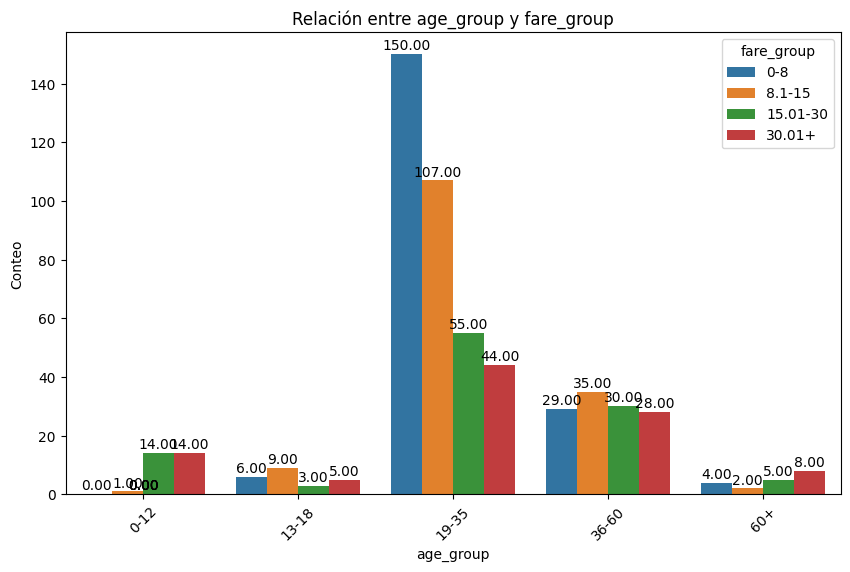

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


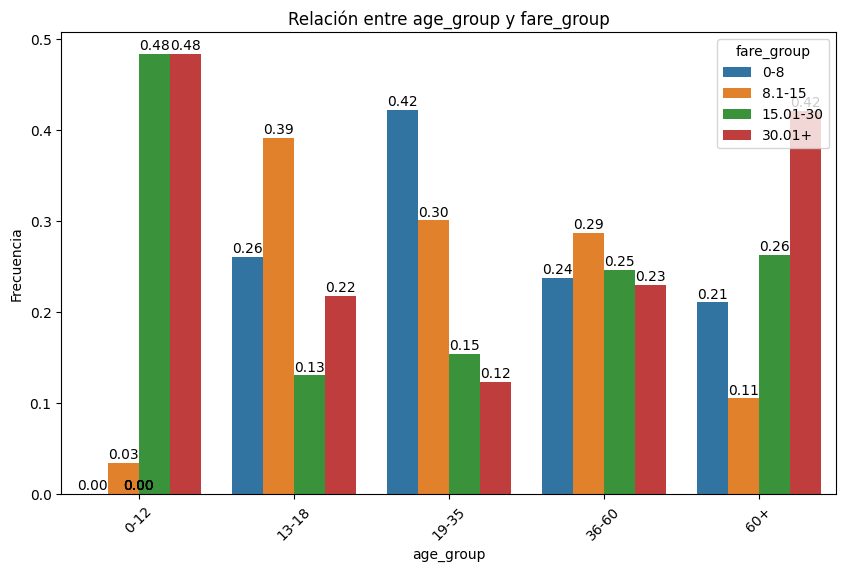

Respuesta yes:


c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


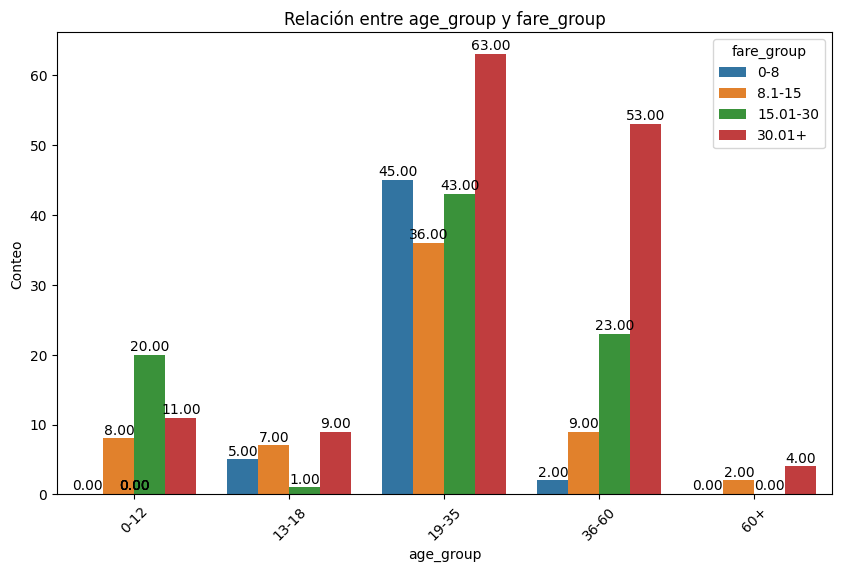

c:\Users\Noelia Montiel\Bootcamp_DS\ONLINE_DS_THEBRIDGE_NOELIAMONTIEL\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


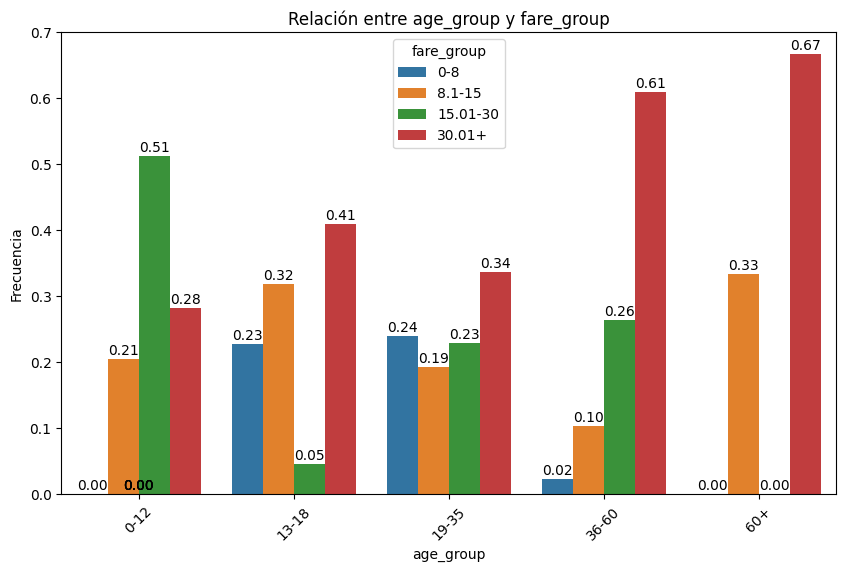

In [44]:
# 2.- Divido mi dataset en tantos subdatasets como valores de mi categórica directora
columnas = ["alive","fare_group","age_group"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

# 3.- Hago un análsis bivariante para cada subdataset y comparo todo
for valor, df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    boot.plot_categorical_relationship_fin(df_datos,col_2,col_1, show_values= True, size_group=len(bins_age))
    boot.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group=len(bins_age))

<font color='green'>

#### CONCLUSIONES - 8

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?   

    - Los niños (0-12) que pagaron tarifas altas (15.01 - 30) se encuentran en mayoría entre los sobrevivientes.   

    - Los adultos jóvenes (19-35) muestran una diferencia más notable en las tarifas pagadas entre sobrevivientes y fallecidos, con una mayor concentración de tarifas altas entre los sobrevivientes.
    - Los adultos mayores (36-60 y 60+) tienen una menor variabilidad en las tarifas, pero los sobrevivientes tienden a haber pagado tarifas más altas en promedio.

</font>

<font color='green'>

#### **OBSERVACIONES PERSONALES**

- Políticas de evacuación: Las políticas de evacuación que priorizaron a mujeres y niños tuvieron un impacto significativo en las tasas de supervivencia y mortalidad.   

- Impacto de la clase social: La clase social tuvo un papel crucial en las probabilidades de supervivencia, con los pasajeros de primera clase teniendo una ventaja significativa.
- Importancia del acompañamiento: Viajar solo o acompañado también influyó en las tasas de supervivencia, con aquellos acompañados teniendo una ligera ventaja en términos de apoyo y asistencia.   
   
Si nos fijamos, el perfil típico de viajero recoge prácticamente todas las directrices de las personas con menos probabilidad de sobrevivir (hombre, embarca en Southampton, viaja solo y en tercera clase). Esto resalta las desigualdades y factores que influenciaron la supervivencia y mortalidad durante el desastre del Titanic.

</font>

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [45]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


In [46]:
df_air_jun.groupby('aircompany')['ingresos'].describe()

,count,mean,std,min,25%,50%,75%,max
aircompany,,,,,,,,
Airnar,100.0,405293.978200,269583.848420,14232.65,185270.6000,396764.220,608356.1225,958617.02
FlyQ,108.0,401619.008056,295633.712828,23498.34,237556.9525,366970.685,473901.4325,1081702.91
MoldaviAir,133.0,548077.209098,374577.838426,11797.85,178872.9000,532426.220,794055.4100,1295515.83
PamPangea,117.0,478417.048718,364458.092328,12383.21,163124.5300,442668.520,763079.0200,1083591.01
TabarAir,142.0,271042.230282,177006.035877,24289.53,95620.5075,258379.745,398147.1925,623089.41


<font color='green'>

- Tenemos el mayor número de vuelos pero nuestros ingresos (considerando la mediana) son los menores de todos.

</font>

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


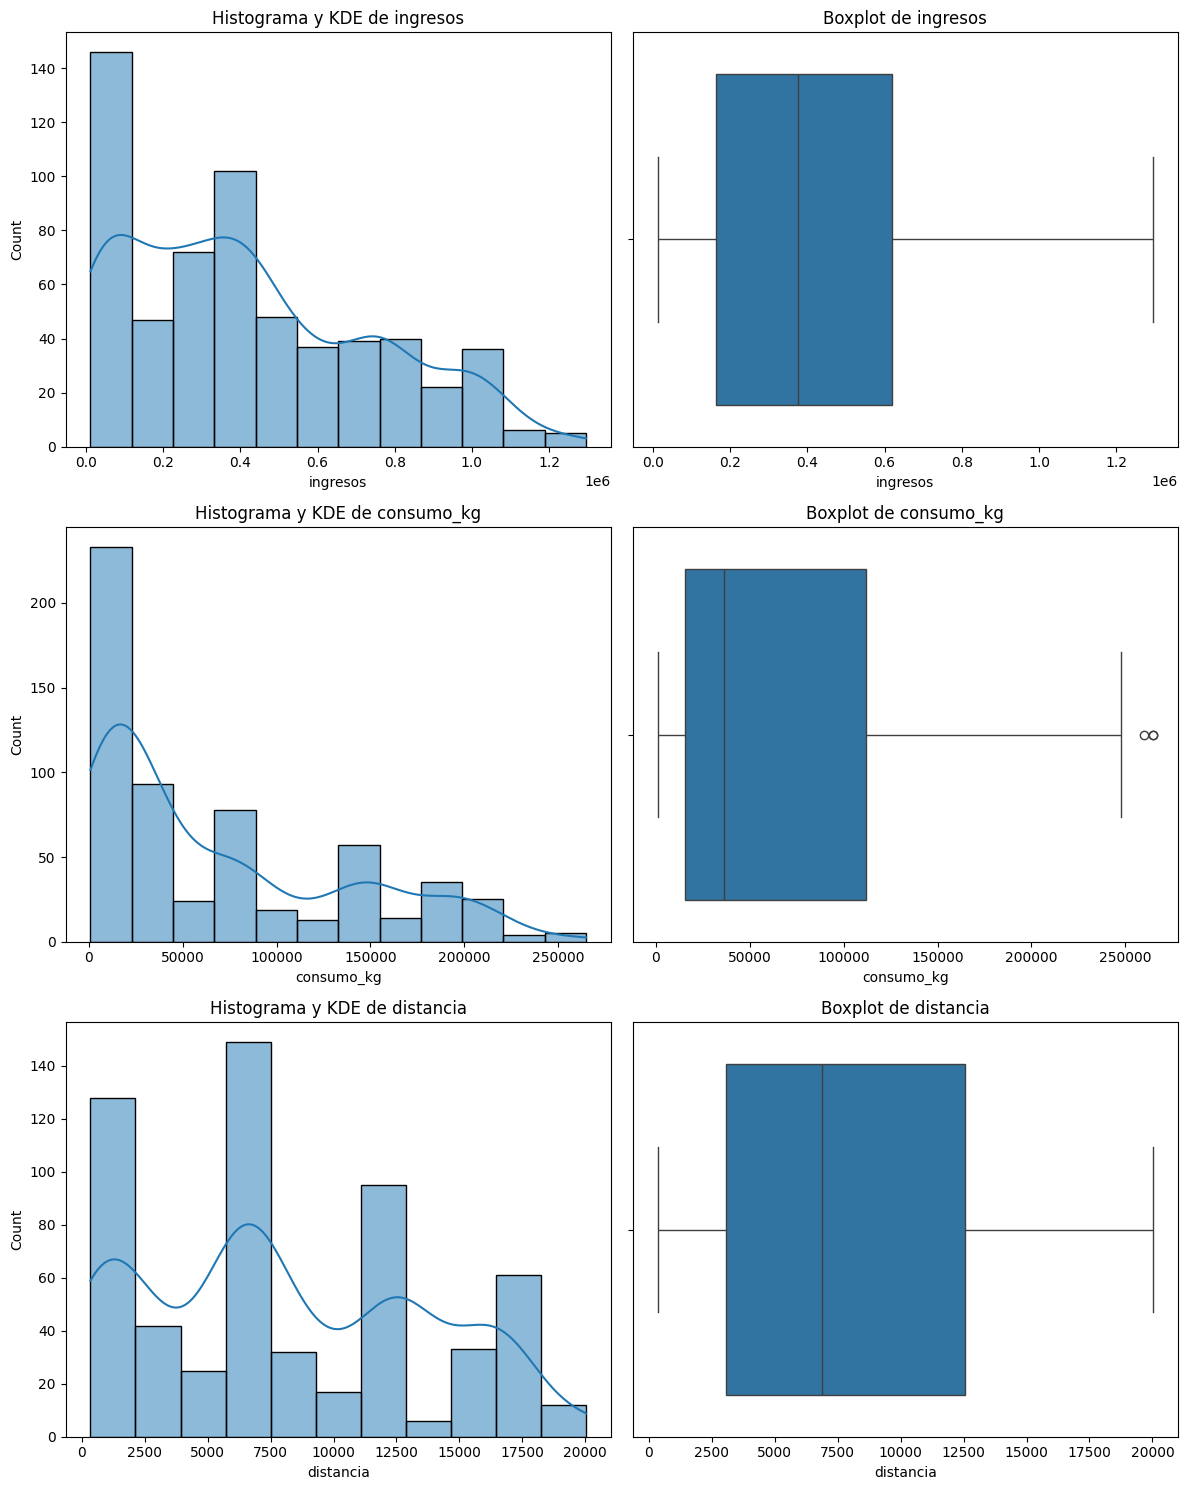

In [47]:
# Lo primero sería mostrar los valores y diagramas de cada uno así como las correlaciones dos a dos:
boot.plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

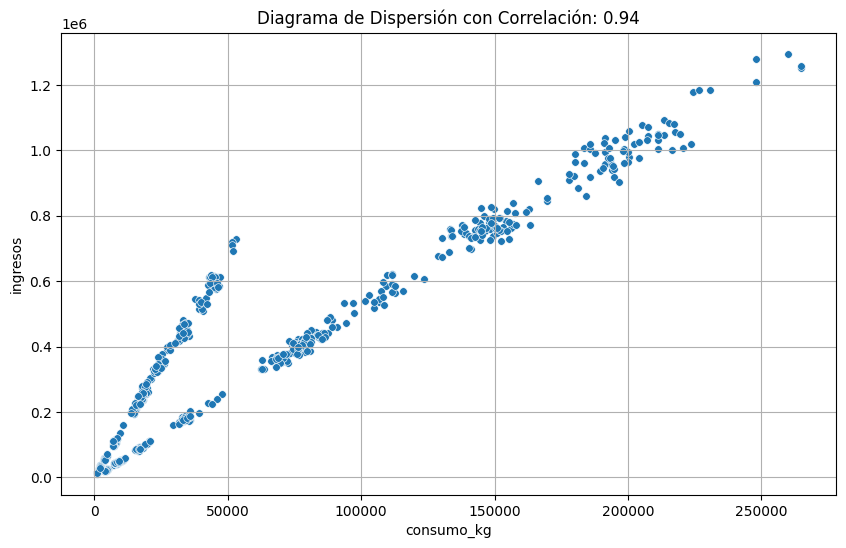

In [48]:
boot.grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos",mostrar_correlacion= True, tamano_puntos= 30)

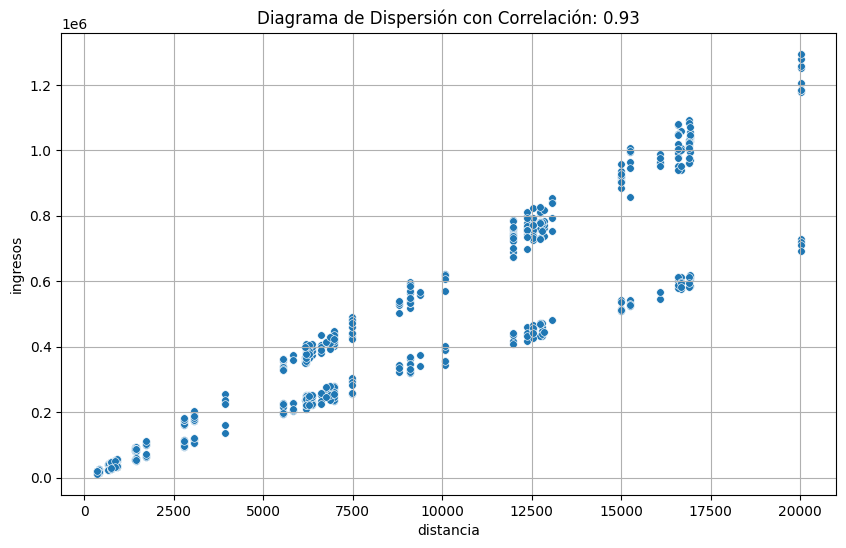

In [49]:
boot.grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos",mostrar_correlacion= True, tamano_puntos= 30)

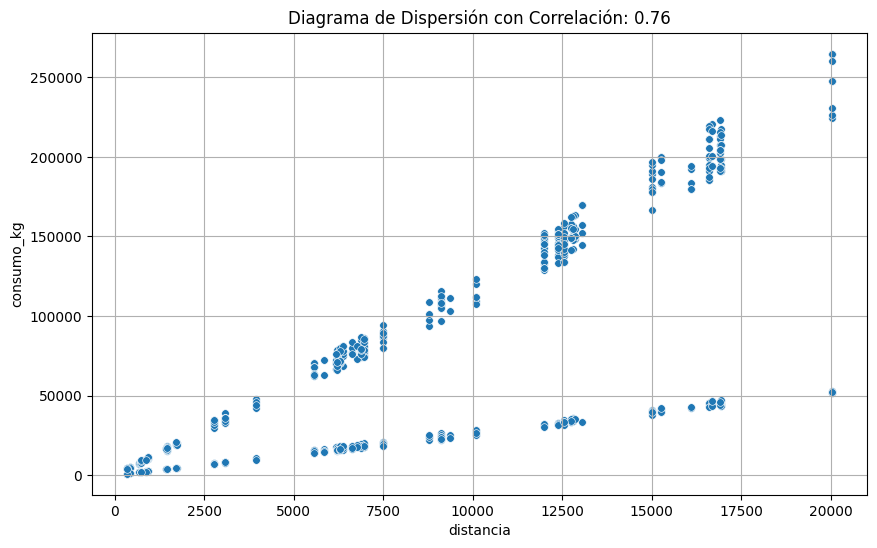

In [50]:
boot.grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg",mostrar_correlacion= True, tamano_puntos= 30)

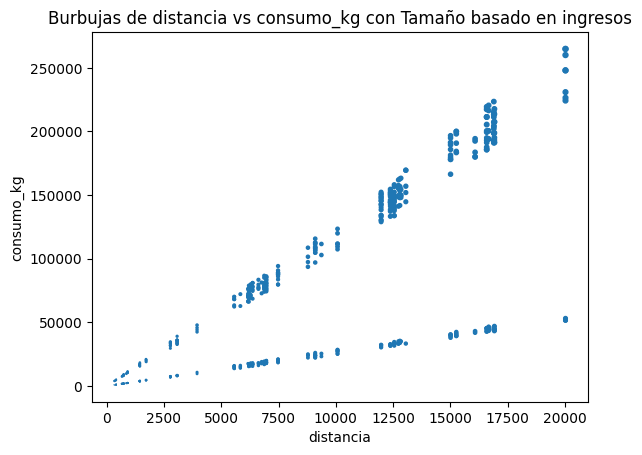

In [51]:
# Lo siguiente será mostrar los tres valores a la vez
boot.bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

In [52]:
corr_matrix = df_air_jun.corr(numeric_only = True)
corr_matrix

,distancia,con_escala,consumo_kg,duracion,ingresos
distancia,1.000000,0.669866,0.762341,0.985963,0.928833
con_escala,0.669866,1.000000,0.322295,0.761097,0.515817
consumo_kg,0.762341,0.322295,1.000000,0.668707,0.944875
duracion,0.985963,0.761097,0.668707,1.000000,0.867515
ingresos,0.928833,0.515817,0.944875,0.867515,1.000000


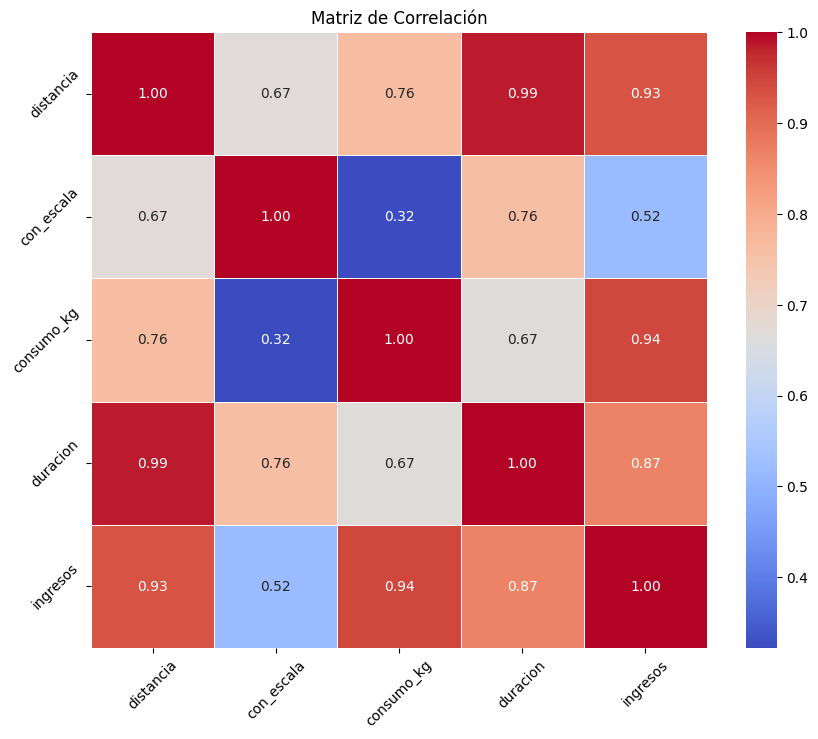

In [53]:
# Ajustar el tamaño de las gráficas
plt.figure(figsize=(10, 8))
# El cmap es el rango de colores usado para representar "el calor"
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
cbar=True, square=True, linewidths=.5)
plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario
plt.show()

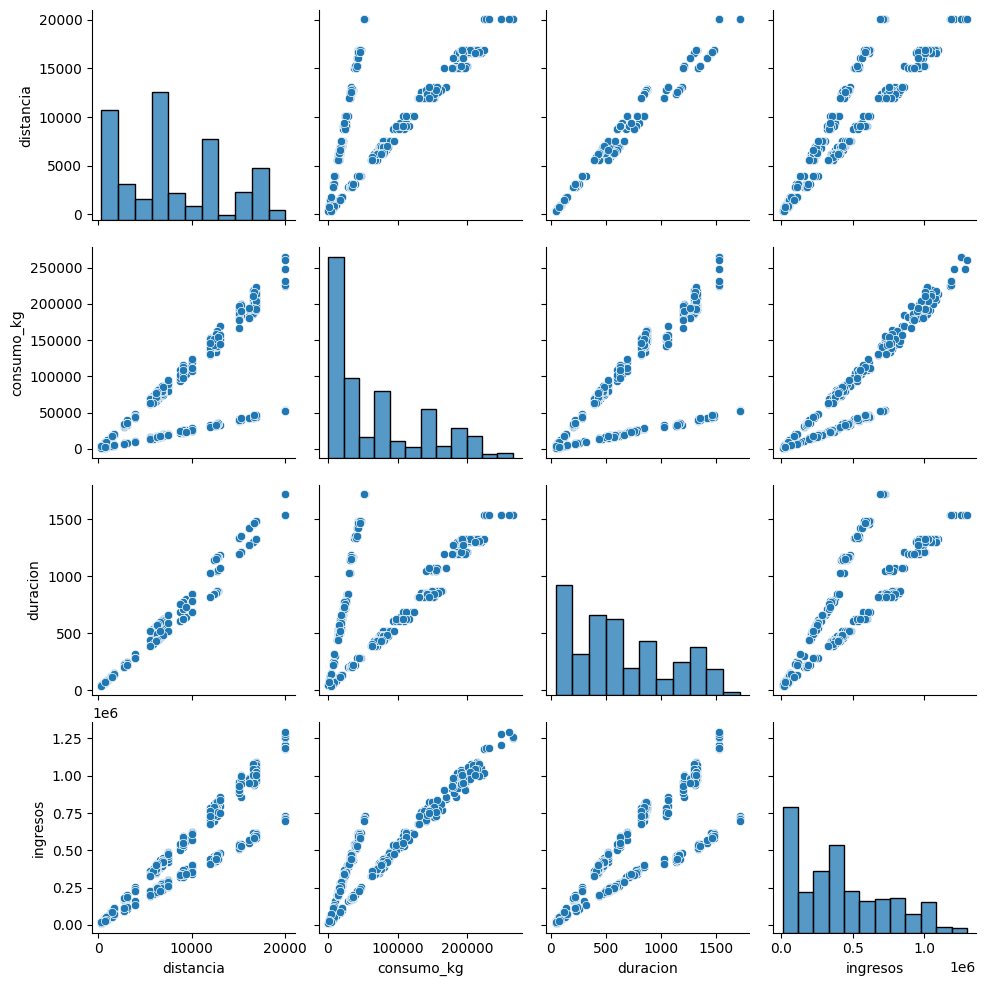

In [54]:
df_solo_numeros = df_air_jun.select_dtypes(include = ["float","int"])
sns.pairplot(df_solo_numeros)
plt.show()

<font color='green'>
- El tamaño de las burbujas depende de los ingresos, y nos deja ver la correlación entre distancia y consumo, aunque claramente hay una línea de vuelos mucho más eficientes, y si nos fijamos en los tamaños de las burbujas de una línea y otra son aparentemente similares.
</font>

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [55]:
df_air_jun['distancia'].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [56]:
# Creamos una columna por categorías de distancia
bins_dist = [0, 3000, 7000, 13000, 20029]
labels_dist = ['Corta distancia', 'Media distancia', 'Larga distancia', 'Ultra larga distancia']
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins_dist, labels=labels_dist, right=False)
df_air_jun.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corta distancia
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Larga distancia
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Larga distancia
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Media distancia
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Larga distancia


Respuesta Corta distancia:


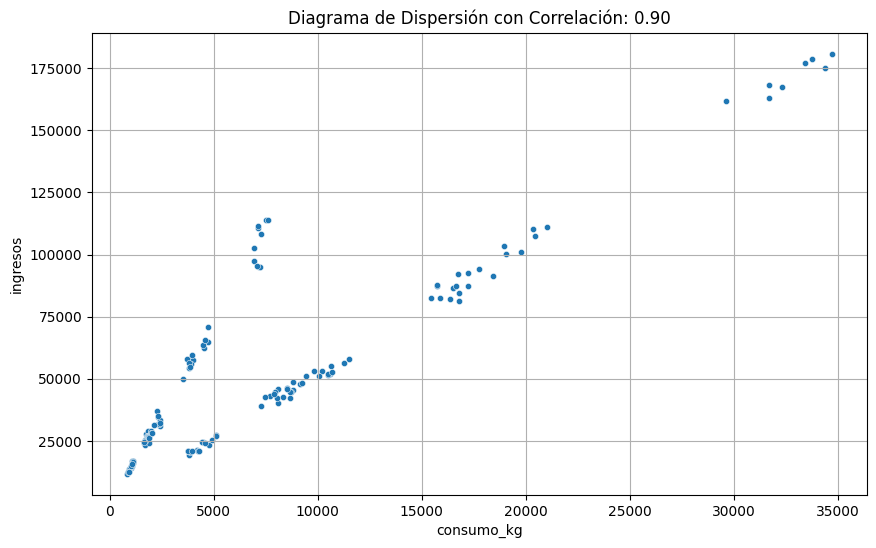

Respuesta Larga distancia:


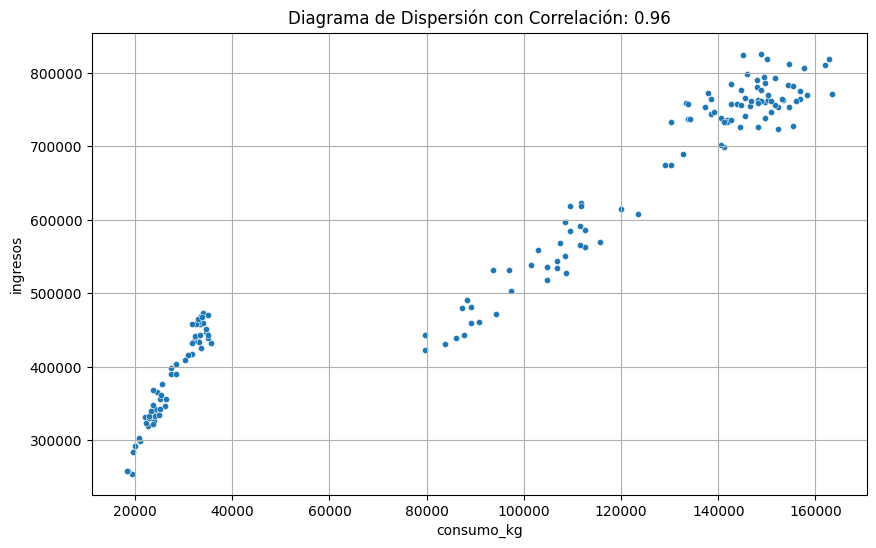

Respuesta Media distancia:


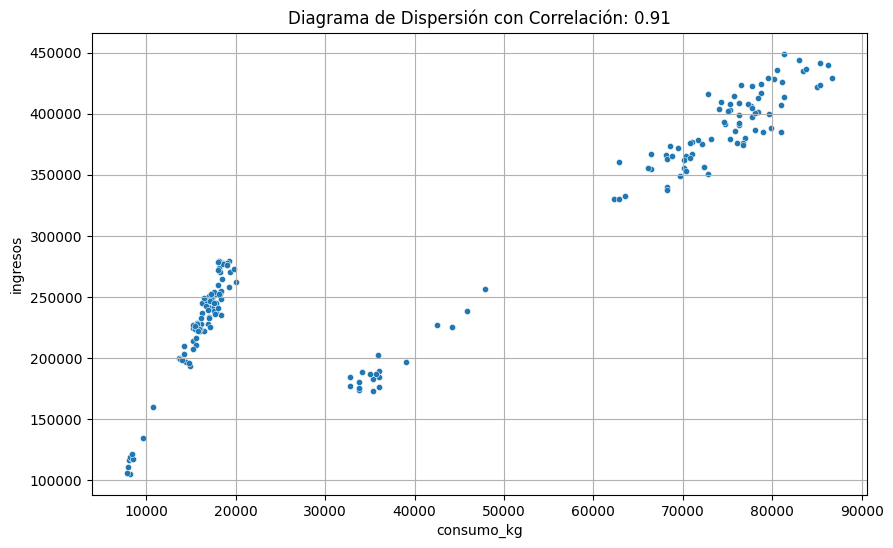

Respuesta nan:


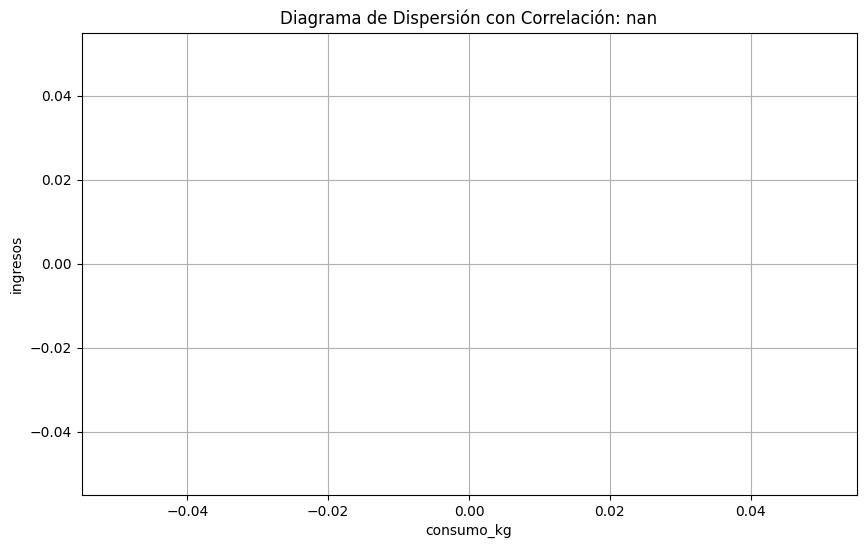

Respuesta Ultra larga distancia:


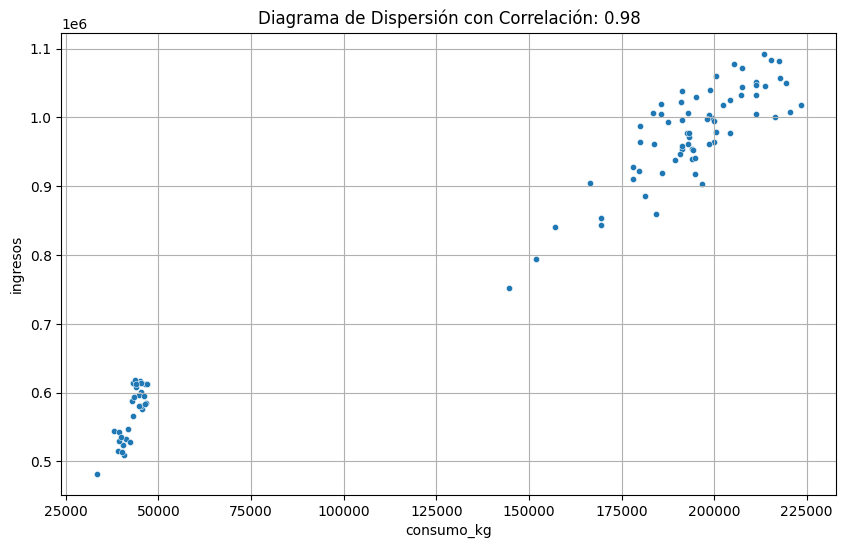

In [57]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]]

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    boot.grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

<font color='green'>
    - En todas las categorías de distancia hay una (esperada) correlación ente ingresos y consumos, pero el hecho de que haya realmente dos rectas nos habla de que los vuelos cortos son más eficientes que los largos.

</font>

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.